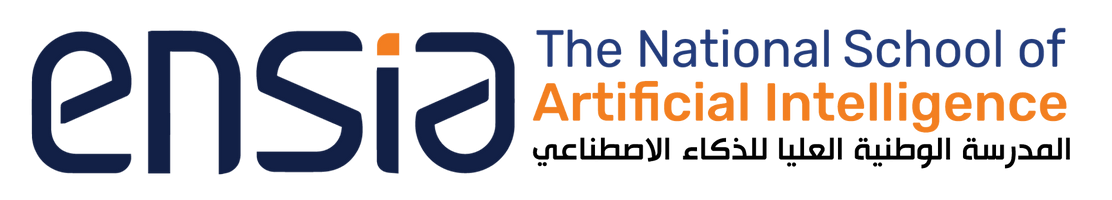

# **Automatic classification of sleep stages**




---

## **Team Members**

- **BOUZID Nessrine** (Team Leader), G5  
- **ABIDAT Souha Nour**, G7  
- **BENALI KHODJA Aya**, G7  
- **KIHAL Yassmine**, G7  
- **LAOUAMER Lydia Serine**, G5
---

# **1- introduction :**

[Here you will find a chart to explain briefly our Approach to make it easy for you](https://www.mermaidchart.com/raw/c7554b42-c2b4-4b97-aa38-ceeeeac2f7f8?theme=light&version=v0.1&format=svg)

We followed a clear methodology to tackle the problem, exploring five different approaches. In each approach, we applied a specific method for handling the data and performed tailored feature engineering. The five approaches are summarized in the diagram below.

### The data preprocessing and transformation techniques we applied are as follows:

- **Wavelet Transformation:** Used to analyze the signal at multiple scales and capture both time and frequency information.
- **Fourier Transformation:** Applied to extract global frequency-domain features from the EEG signals.
- **Spectral Density Estimation:** Utilized to capture the power distribution of the signal over frequency, enhancing the feature set.
- **Statistical Feature Extraction:** Involved computing attributes such as mean, standard deviation, skewness, kurtosis, etc., from the time series.
- **Change Point Detection Method:** Used to detect significant structural changes in the signal, helping to identify key segments for improved feature representation.


### The approaches we took are shortly summarized as follows:
- **First approach:** Extract time-based features, frequency-domain features, change points, and shapelets. Train classical machine learning models (e.g., SVM, XGBoost, MLP) and enhance generalization through stacking, boosting, and hybrid methods.

-  **Second approach:** Develop a Spiking Neural Network (SNN) for EEG-based seizure detection. Evaluate training algorithms (SpikeProp, QuickProp, RProp) on benchmark tasks to assess convergence, efficiency, and accuracy. Select RProp for its superior performance and apply it to classify EEGs across different subject groups.

- **Third approach:** Classical machine learning algorithms including K-Nearest Neighbors (KNN), Support Vector Machines (SVM), and Random Forests, using handcrafted features extracted from the EEG signals.

- **Fourth approach:** Ensemble learning with the XGBoost classifier to enhance prediction accuracy.

- **Fifth approach:** Deep learning with LSTM networks combined with spectral density transformations to capture both temporal and frequency-domain features.

- **Sixth approach:** Temporal Convolutional Networks (TCNs) to model temporal dependencies using convolutional layers.

- **Seventh approach:** Time-Frequency Deep Learning Network inspired by EEGNet, utilizing time-frequency transformations for robust feature extraction.

- **Eight approach:** Hybrid model combining Convolutional Neural Networks (CNN) and LSTM layers to leverage local spatial features and long-term temporal dependencies for improved classification performance.


After reading several research papers and articles, we explored state-of-the-art models and drew inspiration from them for our own approaches.


the state of the art models are shown in the picture bellow :

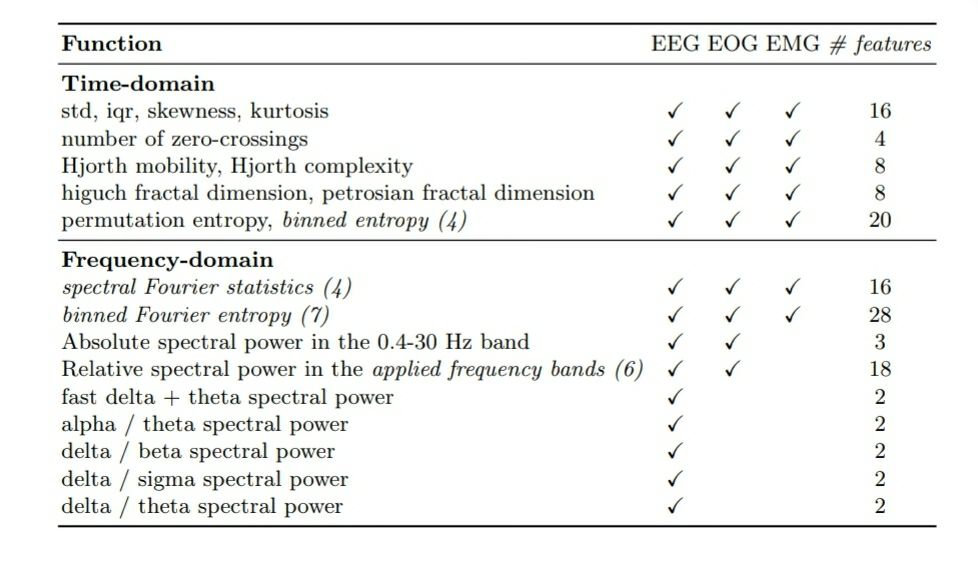

##  Importing necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
from scipy.fft import fft
from scipy.signal import welch
from scipy.stats import boxcox
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pywt
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from keras.layers import Input, Conv1D, BatchNormalization, Activation, SpatialDropout1D, Add, Lambda, Dense
from keras.models import Model
import matplotlib.pyplot as plt
from keras.regularizers import l2
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.utils import to_categorical
from keras import Sequential
from keras import layers
from scipy.stats import skew, kurtosis
import warnings
# Suppress all warnings
warnings.filterwarnings('ignore')

import numpy as np
from scipy import stats, signal
import pywt
import antropy
import ruptures as rpt
import pandas as pd
from nolds import hurst_rs, sampen, dfa

In [ ]:
X = pd.read_csv("Sleep Train 5000.csv", header=None)

# does not contain the ground truth
X_final = pd.read_csv("Sleep Test 1000.csv", header=None)

In [ ]:
X

,0,1,2,3,4,5,6,7,8,9,...,169,170,171,172,173,174,175,176,177,178
0,0,-1.608303,-13.170696,-8.997802,1.347497,5.259585,-1.521367,2.651526,4.651038,3.781685,...,-8.041514,-6.563614,-4.998779,-5.346520,-6.389744,-11.171185,-2.390720,1.086691,6.911355,6.128938
1,0,-2.825397,2.390720,3.955555,-4.216361,2.477656,2.129914,3.955555,-5.172649,5.694261,...,4.129426,7.085226,-2.390720,-2.303785,-3.694750,4.564103,-6.215873,-2.738462,-4.477167,-4.390232
2,0,-15.952625,-3.347008,-15.517949,-9.432479,-16.474237,-6.650549,-14.909402,-12.214408,-10.823443,...,-4.390232,-0.738950,4.477167,12.996825,21.951160,21.081806,21.603418,14.909402,9.345543,6.998291
3,0,-26.558731,-18.560684,-12.040537,-4.216361,-9.432479,1.260562,-2.216850,-3.520879,-5.781197,...,-3.086203,-0.652015,3.607814,15.170208,16.039560,6.128938,3.955555,-1.956044,-2.390720,-4.651038
4,0,-5.607326,6.042003,-4.129426,-5.172649,-7.172161,-11.953602,-7.780708,-0.130403,-2.912332,...,-1.260562,1.608303,4.564103,-4.911844,10.301831,10.127961,8.389256,-2.216850,-4.390232,0.478144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,4,25.341637,26.732601,19.082296,20.907936,22.385836,14.040049,17.430525,13.692307,6.389744,...,-2.303785,12.736019,-7.954579,8.823932,1.086691,6.215873,4.390232,5.781197,-1.260562,7.693773
4995,4,7.693773,13.779243,10.041026,22.994383,9.867155,13.431501,4.216361,16.648108,7.346032,...,-5.781197,-12.127473,-6.563614,-4.129426,4.651038,6.215873,16.908913,7.172161,18.821490,5.781197
4996,4,-0.217338,-4.129426,-3.260073,-0.912821,2.564591,-4.129426,-3.520879,-12.388278,-1.956044,...,-2.303785,-7.954579,-7.693773,-1.260562,0.478144,3.781685,2.999267,-5.259585,-4.129426,0.825885
4997,4,3.955555,3.781685,-9.606349,-0.217338,-13.779243,-5.781197,-10.823443,-11.345055,-9.171673,...,7.519902,-0.912821,4.824908,-0.130403,10.388767,6.128938,12.127473,0.478144,5.085714,4.824908


In [ ]:
type(list(X.columns)[0])

int

In [ ]:
y = X.iloc[:, 0]
X = X.drop(0, axis=1)

In [ ]:
X

,1,2,3,4,5,6,7,8,9,10,...,169,170,171,172,173,174,175,176,177,178
0,-1.608303,-13.170696,-8.997802,1.347497,5.259585,-1.521367,2.651526,4.651038,3.781685,-1.521367,...,-8.041514,-6.563614,-4.998779,-5.346520,-6.389744,-11.171185,-2.390720,1.086691,6.911355,6.128938
1,-2.825397,2.390720,3.955555,-4.216361,2.477656,2.129914,3.955555,-5.172649,5.694261,1.608303,...,4.129426,7.085226,-2.390720,-2.303785,-3.694750,4.564103,-6.215873,-2.738462,-4.477167,-4.390232
2,-15.952625,-3.347008,-15.517949,-9.432479,-16.474237,-6.650549,-14.909402,-12.214408,-10.823443,-7.259097,...,-4.390232,-0.738950,4.477167,12.996825,21.951160,21.081806,21.603418,14.909402,9.345543,6.998291
3,-26.558731,-18.560684,-12.040537,-4.216361,-9.432479,1.260562,-2.216850,-3.520879,-5.781197,-6.128938,...,-3.086203,-0.652015,3.607814,15.170208,16.039560,6.128938,3.955555,-1.956044,-2.390720,-4.651038
4,-5.607326,6.042003,-4.129426,-5.172649,-7.172161,-11.953602,-7.780708,-0.130403,-2.912332,-4.390232,...,-1.260562,1.608303,4.564103,-4.911844,10.301831,10.127961,8.389256,-2.216850,-4.390232,0.478144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,25.341637,26.732601,19.082296,20.907936,22.385836,14.040049,17.430525,13.692307,6.389744,4.129426,...,-2.303785,12.736019,-7.954579,8.823932,1.086691,6.215873,4.390232,5.781197,-1.260562,7.693773
4995,7.693773,13.779243,10.041026,22.994383,9.867155,13.431501,4.216361,16.648108,7.346032,16.735043,...,-5.781197,-12.127473,-6.563614,-4.129426,4.651038,6.215873,16.908913,7.172161,18.821490,5.781197
4996,-0.217338,-4.129426,-3.260073,-0.912821,2.564591,-4.129426,-3.520879,-12.388278,-1.956044,-10.562637,...,-2.303785,-7.954579,-7.693773,-1.260562,0.478144,3.781685,2.999267,-5.259585,-4.129426,0.825885
4997,3.955555,3.781685,-9.606349,-0.217338,-13.779243,-5.781197,-10.823443,-11.345055,-9.171673,-7.432967,...,7.519902,-0.912821,4.824908,-0.130403,10.388767,6.128938,12.127473,0.478144,5.085714,4.824908


In [ ]:
X.describe()

,1,2,3,4,5,6,7,8,9,10,...,169,170,171,172,173,174,175,176,177,178
count,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,...,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000
mean,-0.554607,-0.564193,-0.540193,-0.649433,-0.753712,-1.075914,-1.181350,-1.451674,-1.382415,-1.481303,...,1.190700,1.485347,1.662399,1.745655,1.896240,2.166390,2.260436,2.391720,2.331582,2.544677
std,17.789305,17.597088,17.681466,17.723401,17.403211,17.384649,17.279831,17.366649,17.506116,17.554533,...,17.849879,17.741248,17.593795,17.586370,17.837506,17.770479,17.780897,17.603510,17.718653,17.526130
min,-146.094760,-82.371185,-81.849570,-90.543100,-90.803910,-103.409520,-83.588280,-83.588280,-136.705730,-89.239075,...,-82.371185,-103.844200,-72.460560,-75.329430,-125.925766,-81.501830,-82.197310,-82.197310,-116.362885,-89.934555
25%,-9.345543,-9.258608,-9.519414,-9.693284,-9.432479,-9.693284,-10.127961,-10.562637,-10.301831,-10.562637,...,-7.780708,-7.259097,-7.432967,-7.432967,-6.998291,-6.911355,-6.814286,-6.824420,-6.780952,-6.389744
50%,-0.391209,-0.652015,-0.652015,-0.738950,-0.738950,-0.999756,-1.260562,-1.347497,-1.608303,-1.695238,...,0.867644,1.086691,1.347497,1.434432,1.521367,1.869109,2.042979,2.129914,2.042979,2.477656
75%,8.062149,8.041514,8.215385,8.215385,7.883883,7.780708,7.443468,7.172161,7.432967,7.085226,...,9.780220,10.301831,10.214896,10.301831,10.997314,10.823443,11.084250,11.301588,11.084250,11.258120
max,105.409035,95.585350,91.934070,109.668860,87.065690,87.413430,77.850550,112.972404,86.283270,106.539190,...,97.758730,102.714040,93.498900,90.108420,87.326490,97.063250,91.586330,90.282295,84.544560,84.805374


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

## 0. Visualization

In [ ]:
class_indices = [0]
for i in range(1,5):
    first_index = y_train[y_train == i].index[0]
    class_indices.append(first_index)
    print(f"Class {i} starts at index: {first_index}")

class_indices

Class 1 starts at index: 879
Class 2 starts at index: 1738
Class 3 starts at index: 3214
Class 4 starts at index: 4943


[0, np.int64(879), np.int64(1738), np.int64(3214), np.int64(4943)]

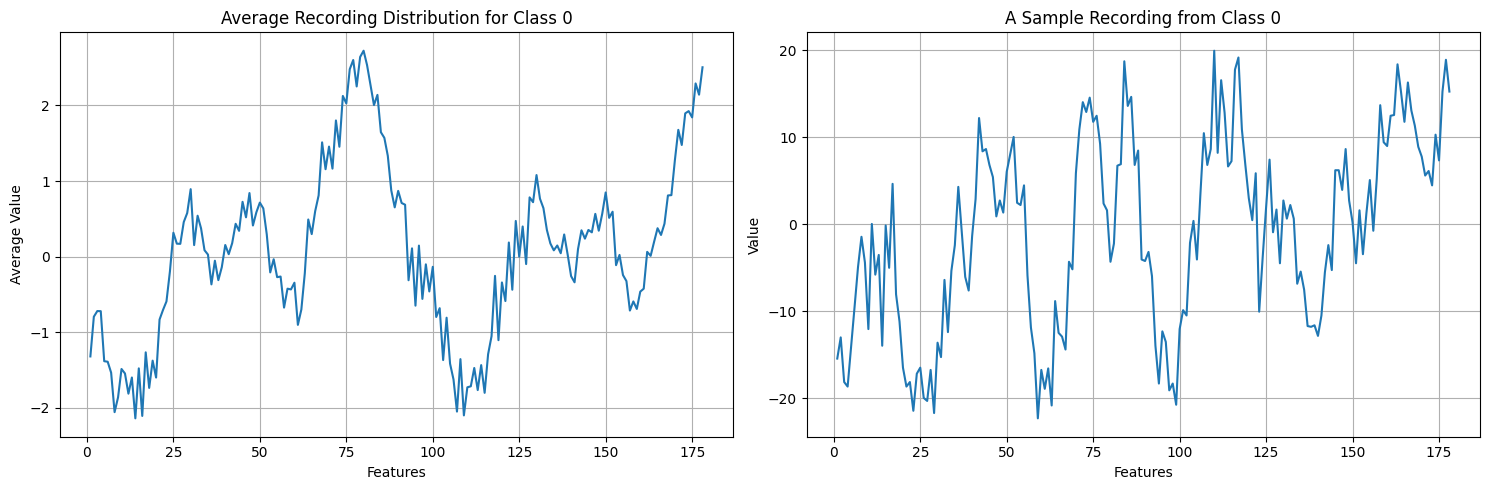

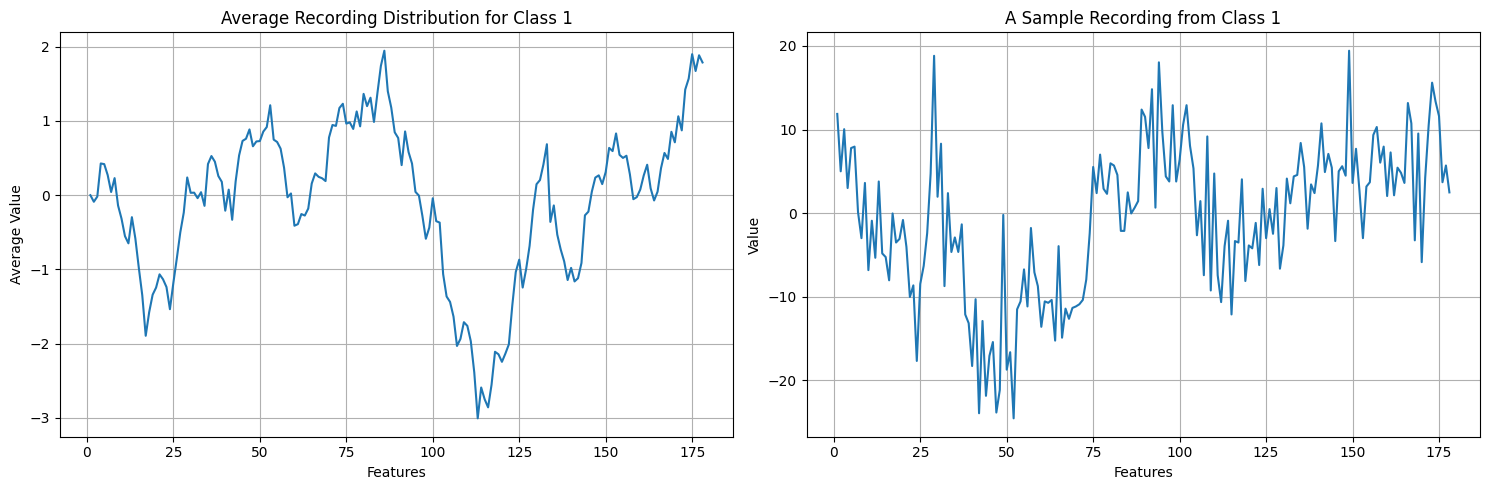

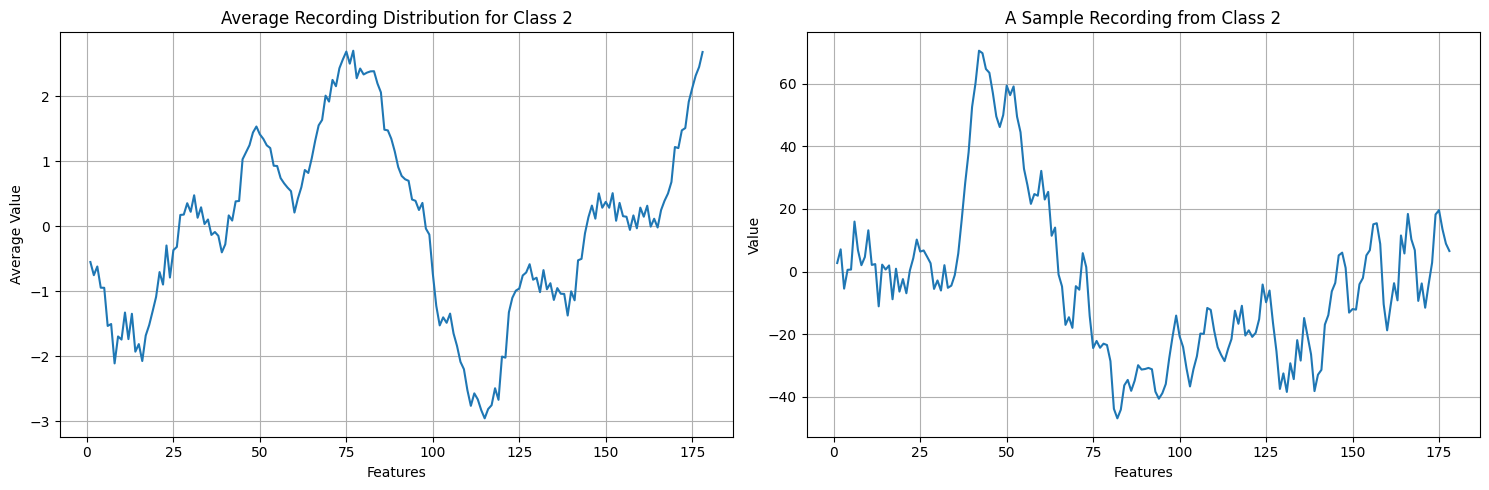

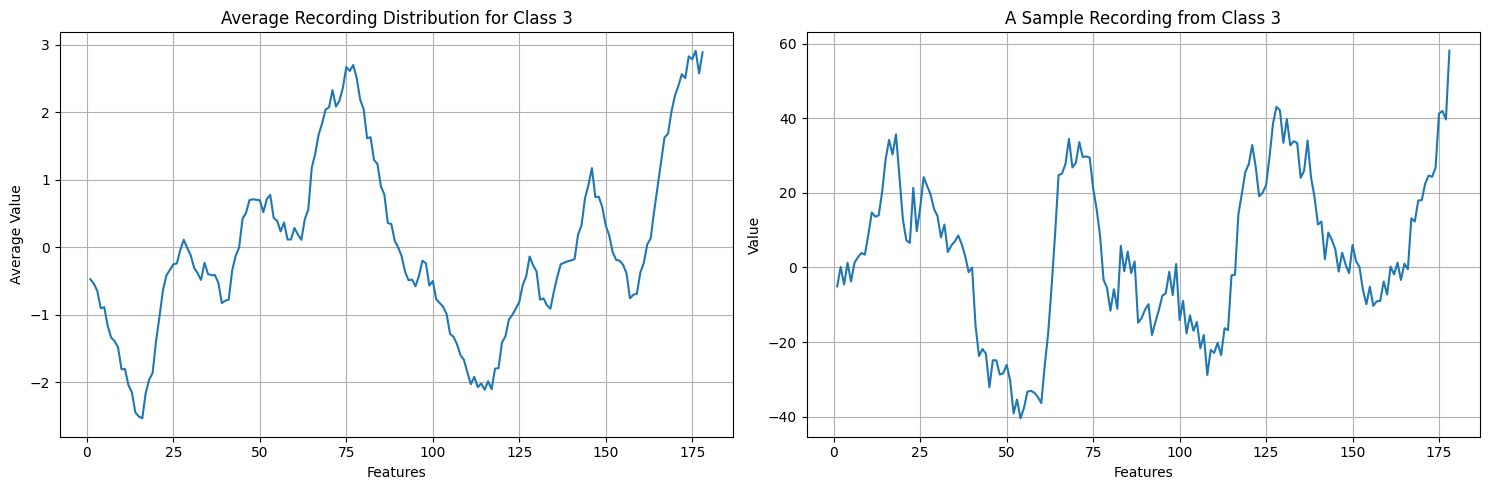

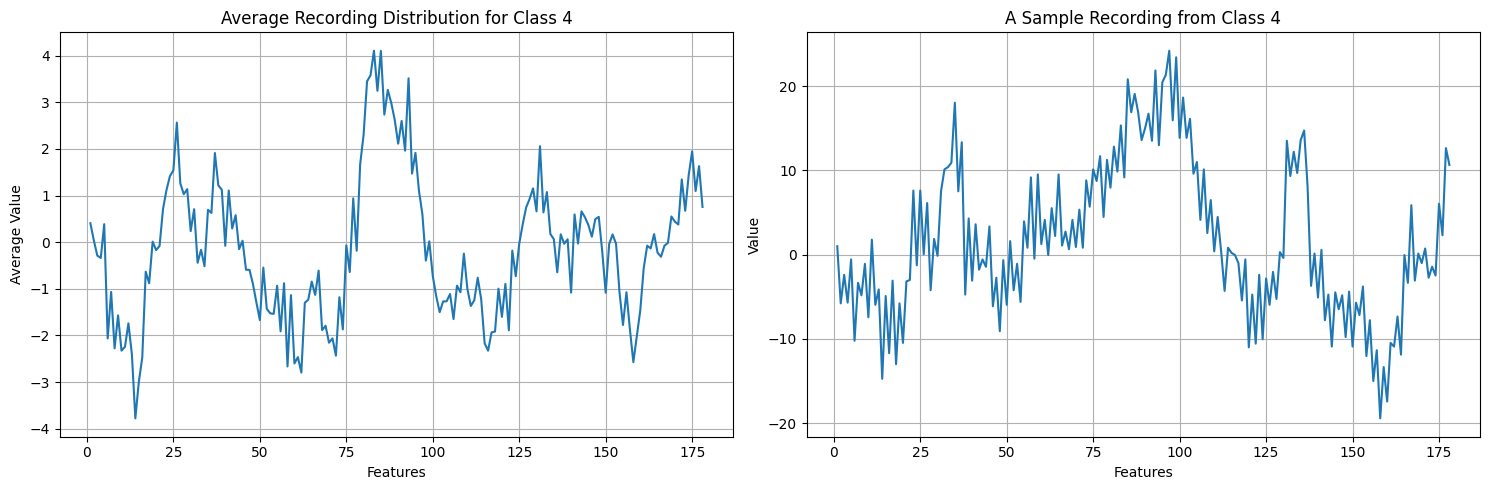

In [ ]:
for i in range(len(class_indices)):

    if i == len(class_indices) - 1:
        avg_records = np.mean(X.iloc[class_indices[i]:, :], axis=0)
        random_index = np.random.randint(class_indices[i], len(X))
    else:
        avg_records = np.mean(X.iloc[class_indices[i]:class_indices[i + 1], :], axis=0)
        random_index = np.random.randint(class_indices[i], class_indices[i + 1])


    fig, ax = plt.subplots(1, 2, figsize=(15, 5))


    ax[0].plot(avg_records)
    ax[0].set_title(f"Average Recording Distribution for Class {i}")
    ax[0].set_xlabel("Features")
    ax[0].set_ylabel("Average Value")
    ax[0].grid(True)


    ax[1].plot(X.iloc[random_index, :])
    ax[1].set_title(f"A Sample Recording from Class {i}")
    ax[1].set_xlabel("Features")
    ax[1].set_ylabel("Value")
    ax[1].grid(True)

    plt.tight_layout()
    plt.show()

## 1. Feature Engineering

#### 1. Spectral Density function (using Power Spectral Density PSD)

In [ ]:
def compute_wavelet_transform(dataframe, wavelet='db4', level=4):
    """
    Computes the Discrete Wavelet Transform (DWT) for each row in the DataFrame.

    Parameters:
    - dataframe (pd.DataFrame): The input DataFrame with time-series data in each row.
    - wavelet (str): The type of wavelet to use (default is 'db4').
    - level (int): The level of decomposition.

    Returns:
    - pd.DataFrame: A DataFrame containing the wavelet coefficients.
    """
    wavelet_features = []

    for _, row in dataframe.iterrows():

        coeffs = pywt.wavedec(row.values, wavelet, level=level)


        features = np.concatenate(coeffs)
        wavelet_features.append(features)

    wavelet_df = pd.DataFrame(wavelet_features)

    return wavelet_df

In [ ]:
X_train_wavelet = compute_wavelet_transform(X_train)
X_test_wavelet = compute_wavelet_transform(X_test)
X_final_wavelet = compute_wavelet_transform(X_final)


pca = PCA(0.95)
X_train_wavelet = pca.fit_transform(X_train_wavelet)
X_test_wavelet = pca.transform(X_test_wavelet)
X_final_wavelet = pca.transform(X_final_wavelet)

columns = [f"pca_feature_{i}" for i in range(X_train_wavelet.shape[1])]

X_train_wavelet = pd.DataFrame(X_train_wavelet, columns=columns)
X_test_wavelet = pd.DataFrame(X_test_wavelet, columns=columns)
X_final_wavelet = pd.DataFrame(X_final_wavelet, columns=columns)

print("The number of features after dimensionality reduction is", X_train_wavelet.shape[1])
print("The number of features after dimensionality reduction is", X_test_wavelet.shape[1])
print("The number of features after dimensionality reduction is", X_final_wavelet.shape[1])

The number of features after dimensionality reduction is 42
The number of features after dimensionality reduction is 42
The number of features after dimensionality reduction is 42


In [ ]:
X_train_wavelet = pd.DataFrame(X_train_wavelet)
X_test_wavelet = pd.DataFrame(X_test_wavelet)
X_final_wavelet = pd.DataFrame(X_final_wavelet)

#### 2. Power Spectral Density

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def compute_psd_rowwise(dataframe, fs=100, nperseg=256):
    """
    Computes the Power Spectral Density (PSD) for each row of the DataFrame using Welch's method.

    Parameters:
    - dataframe (pd.DataFrame): The input DataFrame with time-series data in each row.
    - fs (int): Sampling frequency (default 100 Hz).
    - nperseg (int): Length of each segment for Welch's method (default 256 samples).

    Returns:
    - pd.DataFrame: A new DataFrame with PSD features as columns.
    """
    psd_features = []

    for idx, row in dataframe.iterrows():

        _, psd = welch(row.values, fs=fs, nperseg=nperseg)


        psd_features.append(psd)

    columns = [f'psd_feature_{i}' for i in range(len(psd_features[0]))]
    psd_df = pd.DataFrame(psd_features, columns=columns)

    return psd_df

In [ ]:
X_train_psd = compute_psd_rowwise(X_train)
X_test_psd = compute_psd_rowwise(X_test)
X_final_psd = compute_psd_rowwise(X_final)

print("The number of psd features is", X_train_psd.shape[1])
print("The number of psd features is", X_test_psd.shape[1])
print("The number of psd features is", X_final_psd.shape[1])

c:\Users\client\anaconda3\envs\tfenv\lib\site-packages\scipy\signal\_spectral_py.py:790: UserWarning: nperseg = 256 is greater than input length  = 178, using nperseg = 178
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


The number of psd features is 90
The number of psd features is 90
The number of psd features is 90


As you can see from above, the average recordings is not representative of individual recordings, so any assumptions on the average recordings will not likely hold for individual recordings

In [ ]:
interval_size = 25
num_intervals = (178 + interval_size - 1) // interval_size
X_train_transformed = pd.DataFrame()
X_test_transformed = pd.DataFrame()
X_final_transformed = pd.DataFrame()

In [ ]:
def compute_features(segment):
    return {
        'mean': segment.mean(),
        'variance': segment.var(),
        'range': segment.max() - segment.min(),
        'kurtosis': kurtosis(segment),
        'skewness': skew(segment),
    }

In [ ]:
# Function to apply the transformations
def transform_data(X):
    transformed_data = pd.DataFrame()
    for i in range(num_intervals):

        start_idx = i * interval_size
        end_idx = min((i + 1) * interval_size, 178)

        segment = X.iloc[:, start_idx:end_idx]


        stats = segment.apply(compute_features, axis=1)


        stats_df = pd.DataFrame(stats.tolist()).add_prefix(f'Interval_{i}_')
        transformed_data = pd.concat([transformed_data, stats_df], axis=1)

    return transformed_data

In [ ]:
X_train_transformed = transform_data(X_train)
X_test_transformed = transform_data(X_test)
X_final_transformed = transform_data(X_final)

In [ ]:
X_train_transformed

,Interval_0_mean,Interval_0_variance,Interval_0_range,Interval_0_kurtosis,Interval_0_skewness,Interval_1_mean,Interval_1_variance,Interval_1_range,Interval_1_kurtosis,Interval_1_skewness,...,Interval_6_mean,Interval_6_variance,Interval_6_range,Interval_6_kurtosis,Interval_6_skewness,Interval_7_mean,Interval_7_variance,Interval_7_range,Interval_7_kurtosis,Interval_7_skewness
0,10.649573,62.704084,29.036385,-0.775748,-0.158023,2.992313,112.668278,33.643956,-1.339815,0.011120,...,-1.684806,102.495809,31.731381,-1.357655,0.091832,-12.880912,10.507782,6.433211,-1.5,0.257394
1,-16.988894,208.705788,52.161171,-0.476899,0.671726,-0.377299,108.103250,38.425396,0.080222,-1.022866,...,-2.762803,62.187335,31.644444,-0.068927,-0.181607,-18.299878,35.060374,11.562393,-1.5,-0.429970
2,12.012718,115.712663,35.295726,-0.888981,-0.400949,26.277060,166.963979,45.988767,-0.870808,0.210561,...,-9.060396,76.845584,34.426375,-0.465340,0.514617,8.939845,127.161559,20.342856,-1.5,-0.688242
3,4.591922,94.189467,42.772161,1.355189,1.129353,18.539819,81.485882,30.601219,-1.089018,-0.301691,...,-31.041113,339.336458,65.375335,-0.341297,-0.693905,-49.712495,5.005749,3.999023,-1.5,-0.696313
4,-6.400176,1220.109775,97.106712,-1.678181,0.013997,-11.011223,714.483097,78.763369,-1.239480,-0.469479,...,-3.040996,194.403519,48.336019,-1.194728,0.228059,26.558730,67.165677,16.083029,-1.5,-0.388933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,2.088186,51.438082,25.211232,-1.070433,0.105638,3.677362,198.637036,40.598779,-1.231050,0.353156,...,-12.270046,151.709672,39.816362,-1.268018,-0.166543,1.927065,60.555160,13.648839,-1.5,0.705519
3995,1.424000,178.509081,42.685227,-1.435949,-0.110856,-3.420034,59.821860,33.904761,0.138563,-0.396664,...,-1.430955,163.211676,43.641514,-1.402486,0.087845,5.056736,320.858981,31.818314,-1.5,-0.700348
3996,-9.088215,127.897494,52.769720,0.440340,0.521667,0.012171,882.714832,79.024174,-1.634816,0.194964,...,-0.008694,62.205274,27.210745,-0.983910,0.226964,-0.970777,16.826056,7.389499,-1.5,-0.689639
3997,-14.450384,305.224873,51.031015,-1.317635,0.374861,17.468776,282.784374,59.637606,-0.978545,-0.106680,...,-11.692796,160.120886,46.423444,-0.802639,0.237383,-11.287098,32.357220,11.301587,-1.5,0.239063


In [ ]:
X_train_psd = X_train_psd.reset_index(drop=True)
X_train_wavelet = X_train_wavelet.reset_index(drop=True)
X_train = X_train.reset_index(drop=True)

X_test = X_test.reset_index(drop=True)
X_test_psd = X_test_psd.reset_index(drop=True)
X_test_wavelet = X_test_wavelet.reset_index(drop=True)

X_final = X_final.reset_index(drop=True)
X_final_psd = X_final_psd.reset_index(drop=True)
X_final_wavelet = X_final_wavelet.reset_index(drop=True)

In [ ]:
X_train = pd.concat([X_train, X_train_psd, X_train_wavelet], axis=1)
X_test = pd.concat([X_test, X_test_psd, X_test_wavelet], axis=1)
X_final = pd.concat([X_final, X_final_psd, X_final_wavelet], axis=1)

In [ ]:
X_train.shape

(3999, 310)

In [ ]:
num_classes = 5

# **2- Detailed Approaches**

## **First Approach:**

### **1-1- Feature Extraction:**

- Because Important information is **distributed over time** and hidden in statistical or dynamical properties. we have decided to do a comprehensive feature extration that preserve all the information presented in the time serie. You'll find below the full detailed steps to extract : time domain features, frequency domain features , wavelet and shapelet features


#### **1-1-1- Time domain features:**

**Function Purpose:**  
Extract robust statistical and nonlinear features from an EEG time series for machine learning classifiers.

---

Extracted Features:

- **`mean`**: Average amplitude  
  → *Captures baseline brain activity*

- **`std`**: Standard deviation  
  → *Measures signal variability / arousal*

- **`iqr`**: Interquartile range  
  → *Robust spread, resistant to outliers*

- **`skewness`**: Distribution asymmetry  
  → *Detects bias in signal shape*

- **`kurtosis`**: Peakedness / tail weight  
  → *Captures sharpness or flatness*

- **`zero_crossings`**: Sign changes in signal  
  → *Indicates frequency content*

- **`hjorth_mobility`**: Signal vs. derivative std ratio  
  → *Measures frequency of signal*

- **`hjorth_complexity`**: Change in mobility over time  
  → *Reflects signal irregularity*

- **`hurst_exponent`**: Long-term memory estimate  
  → *Shows persistence vs. randomness*

- **`higuchi_fd`**: Fractal dimension (Higuchi)  
  → *Signal complexity via self-similarity*

- **`petrosian_fd`**: Fractal dim. via zero crossings  
  → *Fast complexity metric*

- **`perm_entropy`**: Permutation entropy  
  → *Quantifies disorder / unpredictability*

- **`binned_entropy`**: Entropy of value histogram  
  → *Measures amplitude diversity*


In [ ]:
def extract_time_domain_features(ts):
    """Extract time domain features from an EEG time series"""
    features = {}

    # Handle NaN values
    ts = np.nan_to_num(ts)

    # Standard statistical features
    features['mean'] = np.mean(ts)
    features['std'] = np.std(ts)

    try:
        features['iqr'] = stats.iqr(ts)
        features['skewness'] = stats.skew(ts)
        features['kurtosis'] = stats.kurtosis(ts)
    except Exception:
        features['iqr'] = 0
        features['skewness'] = 0
        features['kurtosis'] = 0

    # Number of zero-crossings
    try:
        zero_crossings = np.where(np.diff(np.signbit(ts)))[0]
        features['zero_crossings'] = len(zero_crossings)
    except Exception:
        features['zero_crossings'] = 0

    # Hjorth parameters
    try:
        # Mobility
        diff_ts = np.diff(ts)
        var_ts = np.var(ts)
        var_diff_ts = np.var(diff_ts)

        if var_ts == 0:
            mobility = 0
        else:
            mobility = np.sqrt(var_diff_ts / var_ts)
        features['hjorth_mobility'] = mobility

        # Complexity
        diff_diff_ts = np.diff(diff_ts)
        var_diff_diff_ts = np.var(diff_diff_ts)

        if var_diff_ts == 0:
            complexity = 0
        else:
            complexity = np.sqrt(var_diff_diff_ts / var_diff_ts) / mobility if mobility > 0 else 0
        features['hjorth_complexity'] = complexity
    except Exception:
        features['hjorth_mobility'] = 0
        features['hjorth_complexity'] = 0

    # Fractal dimensions
    try:
        features['hurst_exponent'] = hurst_rs(ts)
    except Exception:
        features['hurst_exponent'] = 0

    try:
        features['higuchi_fd'] = antropy.higuchi_fd(ts)
    except Exception:
        features['higuchi_fd'] = 0

    try:
        features['petrosian_fd'] = antropy.petrosian_fd(ts)
    except Exception:
        features['petrosian_fd'] = 0

    # Entropy measures
    try:
        features['perm_entropy'] = antropy.perm_entropy(ts, normalize=True)
    except Exception:
        features['perm_entropy'] = 0

    # Calculate binned entropy with 4 bins
    try:
        hist, _ = np.histogram(ts, bins=4)
        hist_sum = hist.sum()
        if hist_sum > 0:
            hist = hist / hist_sum
            hist = hist[hist > 0]  # Remove zero probabilities
            features['binned_entropy'] = -np.sum(hist * np.log2(hist))
        else:
            features['binned_entropy'] = 0
    except Exception:
        features['binned_entropy'] = 0

    return features

#### **1-1-2- Frequency domain features:**


- As common in signal processing always working with frequency domain give good results so we have decided to extract frequency related patterns  Here's why each step is important:

- **FFT Computation:**  
  It helps us find important frequency information hidden in the EEG signals.

- **Frequency Bands:**  
  Focusing on key brain wave ranges helps us detect different brain states.

- **Absolute & Relative Power:**  
  These features show how strong the signals are and make comparisons fair across different recordings.

- **Power Ratios:**  
  They catch small changes in brain activity that help tell states apart.

- **Spectral Statistics:**  
  These numbers describe the signal’s complexity, helping the model understand differences better.

- **Binned Fourier Entropy:**  
  Measures how complicated the brain signals are, improving classification accuracy.



In [ ]:
def extract_frequency_domain_features(ts, fs=250):  # Assuming 250 Hz sampling frequency
    """Extract frequency domain features from an EEG time series"""
    features = {}

    # Handle NaN values
    ts = np.nan_to_num(ts)

    try:
        # Compute the FFT
        ts_fft = np.fft.rfft(ts)
        ts_fft_abs = np.abs(ts_fft)
        freqs = np.fft.rfftfreq(len(ts), 1/fs)

        # Define frequency bands (Hz)
        bands = {
            'delta': (0.5, 4),
            'theta': (4, 8),
            'alpha': (8, 13),
            'beta': (13, 30),
            'gamma': (30, 100),
            'sigma': (12, 14)  # Sleep spindles
        }

        # Spectral power in bands
        total_power = np.sum(ts_fft_abs**2)

        # Absolute spectral power in the 0.4-30 Hz band
        mask_04_30 = np.logical_and(freqs >= 0.4, freqs <= 30)
        features['abs_power_0.4_30Hz'] = np.sum(ts_fft_abs[mask_04_30]**2)

        # Relative spectral power in frequency bands
        for band_name, (low, high) in bands.items():
            mask = np.logical_and(freqs >= low, freqs <= high)
            band_power = np.sum(ts_fft_abs[mask]**2)
            features[f'abs_power_{band_name}'] = band_power
            features[f'rel_power_{band_name}'] = band_power / total_power if total_power > 0 else 0

        # Spectral power ratios
        features['delta_theta_ratio'] = features['rel_power_delta'] / features['rel_power_theta'] if features['rel_power_theta'] > 0 else 0
        features['delta_beta_ratio'] = features['rel_power_delta'] / features['rel_power_beta'] if features['rel_power_beta'] > 0 else 0
        features['delta_sigma_ratio'] = features['rel_power_delta'] / features['rel_power_sigma'] if features['rel_power_sigma'] > 0 else 0
        features['alpha_theta_ratio'] = features['rel_power_alpha'] / features['rel_power_theta'] if features['rel_power_theta'] > 0 else 0

        # Spectral Fourier statistics
        amp_spectrum = ts_fft_abs
        features['spectral_mean'] = np.mean(amp_spectrum)
        features['spectral_std'] = np.std(amp_spectrum)
        features['spectral_skewness'] = stats.skew(amp_spectrum) if len(amp_spectrum) > 2 else 0
        features['spectral_kurtosis'] = stats.kurtosis(amp_spectrum) if len(amp_spectrum) > 3 else 0

        # Binned Fourier entropy with 7 bins
        hist, _ = np.histogram(amp_spectrum, bins=7)
        hist_sum = hist.sum()
        if hist_sum > 0:
            hist = hist / hist_sum
            hist = hist[hist > 0]  # Remove zero probabilities
            features['binned_fourier_entropy'] = -np.sum(hist * np.log2(hist))
        else:
            features['binned_fourier_entropy'] = 0
    except Exception as e:
        # If frequency domain analysis fails, add default values
        features['freq_domain_error'] = str(e)
        for band_name in ['delta', 'theta', 'alpha', 'beta', 'gamma', 'sigma']:
            features[f'abs_power_{band_name}'] = 0
            features[f'rel_power_{band_name}'] = 0

        features['delta_theta_ratio'] = 0
        features['delta_beta_ratio'] = 0
        features['delta_sigma_ratio'] = 0
        features['alpha_theta_ratio'] = 0

        features['spectral_mean'] = 0
        features['spectral_std'] = 0
        features['spectral_skewness'] = 0
        features['spectral_kurtosis'] = 0
        features['binned_fourier_entropy'] = 0
        features['abs_power_0.4_30Hz'] = 0

    return features

#### **1-1-3- Wavelet features:**


- **Why Wavelets:**  
  Unlike time or frequency analysis alone, wavelets capture both when and at what scale changes happen in the EEG signal.Breaking down the signal into multiple levels reveals details at different resolutions, improving the ability to capture complex brain activity patterns. Here's explanation of what we did and why

- **Wavelet Coefficient Statistics:**  
  Features like mean, standard deviation, energy, and entropy of coefficients describe signal behavior more richly, highlighting subtle variations in brain signals.

- **Relative Wavelet Energy:**  
  Shows how signal energy is distributed across scales, which helps differentiate between brain states.


In [ ]:
def extract_wavelet_features(ts, wavelet='db4', level=None):
    """Extract wavelet-based features from an EEG time series"""
    features = {}

    # Handle NaN values
    ts = np.nan_to_num(ts)

    # Calculate appropriate level based on signal length
    if level is None:
        # Maximum level is log2(signal_length)
        max_level = int(np.log2(len(ts)))
        # Use a safer level (max_level - 2) to avoid boundary effects
        level = max(1, max_level - 2)

    # Perform wavelet decomposition
    try:
        coeffs = pywt.wavedec(ts, wavelet, level=level)

        # Extract features from each decomposition level
        for i, coeff in enumerate(coeffs):
            if i == 0:
                band_name = 'approximation'
            else:
                band_name = f'detail_{i}'

            # Basic statistics of wavelet coefficients
            features[f'wavelet_{band_name}_mean'] = np.mean(coeff)
            features[f'wavelet_{band_name}_std'] = np.std(coeff)
            features[f'wavelet_{band_name}_energy'] = np.sum(coeff**2)
            features[f'wavelet_{band_name}_entropy'] = shannon_entropy(coeff)

        # Relative wavelet energy
        total_energy = sum([features[f'wavelet_{bn}_energy'] for bn in ['approximation'] + [f'detail_{i}' for i in range(1, level+1)]])
        for i in range(level+1):
            if i == 0:
                band_name = 'approximation'
            else:
                band_name = f'detail_{i}'
            features[f'wavelet_{band_name}_rel_energy'] = features[f'wavelet_{band_name}_energy'] / total_energy if total_energy > 0 else 0

    except Exception as e:
        # If wavelet decomposition fails, add empty features
        features['wavelet_error'] = str(e)
        # Add placeholder features
        features['wavelet_approximation_mean'] = 0
        features['wavelet_approximation_std'] = 0
        features['wavelet_approximation_energy'] = 0
        features['wavelet_approximation_entropy'] = 0
        features['wavelet_approximation_rel_energy'] = 0

    return features

#### **1-1-4- Change Point features**


**Why Change Point Detection Matters:**  
  EEG signals often shift suddenly due to changes in brain state (e.g., moving between sleep stages). Change point detection helps capture **when** these shifts happen, which time or frequency features might overlook.
Here is the importance of the extracted features for our task
- **Transition Detection**
  - `num_change_points`: Helps detect how often the brain switches stages (e.g., from REM to NREM), which is key for identifying sleep structure.

- **Segment Duration**
  - `mean_segment_length`, `var_segment_length`, `max_segment_length`, `min_segment_length`: Sleep stages last different durations; these features help model how long stable stages persist.

- **Segment Intensity**
  - `mean_of_segment_means`, `var_of_segment_means`, `max_segment_mean_diff`: Each sleep stage has a different EEG baseline—these help distinguish stages based on average activity.

- **Segment Variability**
  - `mean_of_segment_vars`, `var_of_segment_vars`: Some stages (like REM) show more signal fluctuation than othe

In [ ]:
def extract_change_point_features(ts, penalty=1, model="l2"):
    """Extract features related to change points in the time series"""
    features = {}

    # Handle NaN values
    ts = np.nan_to_num(ts)

    try:
        # Perform change point detection using Pelt method
        algo = rpt.Pelt(model=model).fit(ts)
        change_points = algo.predict(pen=penalty)

        # Number of change points
        features['num_change_points'] = len(change_points) - 1  # Subtract 1 because the last point is always included

        # If we found change points, extract features from segments
        if len(change_points) > 1:
            segments = []
            prev_cp = 0
            for cp in change_points:
                segments.append(ts[prev_cp:cp])
                prev_cp = cp

            # Calculate mean, variance, and length of each segment
            segment_means = [np.mean(segment) for segment in segments]
            segment_vars = [np.var(segment) for segment in segments]
            segment_lengths = [len(segment) for segment in segments]

            # Features based on segments
            features['mean_segment_length'] = np.mean(segment_lengths)
            features['var_segment_length'] = np.var(segment_lengths)
            features['max_segment_length'] = np.max(segment_lengths)
            features['min_segment_length'] = np.min(segment_lengths)

            features['mean_of_segment_means'] = np.mean(segment_means)
            features['var_of_segment_means'] = np.var(segment_means)
            features['max_segment_mean_diff'] = np.max(segment_means) - np.min(segment_means)

            features['mean_of_segment_vars'] = np.mean(segment_vars)
            features['var_of_segment_vars'] = np.var(segment_vars)
        else:
            # If no change points found, set default values
            features['mean_segment_length'] = len(ts)
            features['var_segment_length'] = 0
            features['max_segment_length'] = len(ts)
            features['min_segment_length'] = len(ts)

            features['mean_of_segment_means'] = np.mean(ts)
            features['var_of_segment_means'] = 0
            features['max_segment_mean_diff'] = 0

            features['mean_of_segment_vars'] = np.var(ts)
            features['var_of_segment_vars'] = 0
    except Exception as e:
        # If change point detection fails, add default values
        features['change_point_error'] = str(e)
        features['num_change_points'] = 0
        features['mean_segment_length'] = len(ts)
        features['var_segment_length'] = 0
        features['max_segment_length'] = len(ts)
        features['min_segment_length'] = len(ts)
        features['mean_of_segment_means'] = np.mean(np.nan_to_num(ts))
        features['var_of_segment_means'] = 0
        features['max_segment_mean_diff'] = 0
        features['mean_of_segment_vars'] = np.var(np.nan_to_num(ts))
        features['var_of_segment_vars'] = 0

    return features

#### **1-1-5- Shapelets features**


- **Why Shapelets?**

Shapelets capture **discriminative local patterns** in EEG, like spindles or K-complexes, which are key markers of sleep stages.

---

- **Feature Importance in Sleep Stage Classification**

  - **Pattern Similarity**
    - `shapelet_{i}_min_dist`, `shapelet_mean_dist`, etc.: Measure how well EEG matches known motifs — lower distance = stronger pattern presence.

  - **Pattern Location**
    - `shapelet_{i}_position`: Indicates **when** key patterns occur — useful as some patterns are stage-time dependent.

  - **Pattern Duration**
    - `shapelet_{i}_length`: Reflects how long motifs last — different stages have patterns of different lengths.


In [ ]:
def extract_shapelet_features(ts, num_shapelets=10, shapelet_lengths=[10, 20, 30]):
    """
    Extract shapelet-based features from an EEG time series

    Parameters:
    -----------
    ts : array-like
        The EEG time series
    num_shapelets : int
        Number of candidate shapelets to extract
    shapelet_lengths : list
        List of potential shapelet lengths to consider

    Returns:
    --------
    features : dict
        Dictionary of shapelet-based features
    """
    import numpy as np
    from scipy.spatial.distance import euclidean

    features = {}

    # Handle NaN values
    ts = np.nan_to_num(ts)

    try:
        # Generate candidate shapelets
        candidates = []
        for length in shapelet_lengths:
            if length >= len(ts):
                continue

            # Extract subsequences of specified length
            for i in range(len(ts) - length + 1):
                shapelet = ts[i:i+length]
                # Normalize shapelet to have zero mean and unit variance
                if np.std(shapelet) > 0:
                    shapelet = (shapelet - np.mean(shapelet)) / np.std(shapelet)
                candidates.append((shapelet, i, length))

        # If we have too many candidates, select a subset
        if len(candidates) > num_shapelets:
            # Random selection (could be improved with more sophisticated methods)
            indices = np.random.choice(len(candidates), num_shapelets, replace=False)
            candidates = [candidates[i] for i in indices]

        # Calculate features for each shapelet
        for i, (shapelet, position, length) in enumerate(candidates):
            if i >= num_shapelets:
                break

            # Calculate minimum distance to this shapelet from all positions in the time series
            min_dist = float('inf')
            for j in range(len(ts) - length + 1):
                subseq = ts[j:j+length]
                if np.std(subseq) > 0:
                    subseq = (subseq - np.mean(subseq)) / np.std(subseq)
                dist = euclidean(shapelet, subseq)
                min_dist = min(min_dist, dist)

            features[f'shapelet_{i}_min_dist'] = min_dist
            features[f'shapelet_{i}_position'] = position / len(ts)  # Normalized position
            features[f'shapelet_{i}_length'] = length

        # Calculate additional aggregate features
        if candidates:
            shapelet_dists = [features[f'shapelet_{i}_min_dist'] for i in range(min(num_shapelets, len(candidates)))]
            features['shapelet_mean_dist'] = np.mean(shapelet_dists)
            features['shapelet_std_dist'] = np.std(shapelet_dists)
            features['shapelet_min_dist'] = np.min(shapelet_dists)
            features['shapelet_max_dist'] = np.max(shapelet_dists)

    except Exception as e:
        # If shapelet extraction fails, add default values
        features['shapelet_error'] = str(e)
        for i in range(num_shapelets):
            features[f'shapelet_{i}_min_dist'] = 0
            features[f'shapelet_{i}_position'] = 0
            features[f'shapelet_{i}_length'] = 0

        features['shapelet_mean_dist'] = 0
        features['shapelet_std_dist'] = 0
        features['shapelet_min_dist'] = 0
        features['shapelet_max_dist'] = 0

    return features

#### **1-1-6- combining all features**


In [ ]:
def extract_all_features(ts, fs=250, include_shapelets=True):
    """Extract all features including shapelet features from an EEG time series"""
    # Check for NaN or infinite values and replace them
    if np.any(~np.isfinite(ts)):
        ts = np.nan_to_num(ts)

    time_features = extract_time_domain_features(ts)
    freq_features = extract_frequency_domain_features(ts, fs)
    wavelet_features = extract_wavelet_features(ts)
    cp_features = extract_change_point_features(ts)

    # Add shapelet features if requested
    if include_shapelets:
        shapelet_features = extract_shapelet_features(ts)
    else:
        shapelet_features = {}

    # Combine all feature sets
    features = {**time_features, **freq_features, **wavelet_features, **cp_features, **shapelet_features}
    return features

In [ ]:
def create_feature_dataset(data, labels=None):
    """
    Extract features from all time series in the dataset and create a new dataset
    with features and labels

    Parameters:
    -----------
    data : pandas DataFrame
        Each row contains a time series
    labels : array-like, optional
        Labels for each time series. If None, first column is assumed to be the label

    Returns:
    --------
    X_new : pandas DataFrame
        Dataset with extracted features
    """
    # If labels are not provided, assume first column is the label
    if labels is None and isinstance(data, pd.DataFrame):
        if 'label' in data.columns:
            labels = data['label'].values
            data = data.drop('label', axis=1)
        else:
            # Assuming the first column (index 0) contains the labels
            labels = data.iloc[:, 0].values
            data = data.iloc[:, 1:]

    # Extract features from each time series
    all_features = []
    for i in range(len(data)):
        if isinstance(data, pd.DataFrame):
            ts = data.iloc[i].values
        else:
            ts = data[i]

        try:
            features = extract_all_features(ts)
            all_features.append(features)
        except Exception as e:
            print(f"Error processing row {i}: {str(e)}")
            # Add empty features as fallback
            all_features.append({'error': str(e)})

    # Convert to DataFrame
    X_new = pd.DataFrame(all_features)

    # Add labels if provided
    if labels is not None:
        X_new['label'] = labels

    return X_new

In [ ]:
from sklearn.model_selection import train_test_split

# Step 1: Extract labels and features
labels = X.iloc[:, 0].values  # Assuming first column contains labels
data = X.iloc[:, 1:]          # All other columns are features

# Step 2: Split the data into train (60%), validation (20%), and test (20%)
X_temp, X_test, y_temp, y_test = train_test_split(data, labels, test_size=0.2, stratify=labels, random_state=42)
# 0.25 x 0.8 = 0.2 → 60% train, 20% val, 20% test
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42)



In [ ]:
# Step 3: Create feature datasets from each split
X_train_new = create_feature_dataset(X_train, y_train)
X_val_new = create_feature_dataset(X_val, y_val)
X_test_new = create_feature_dataset(X_test, y_test)

#saving them
X_train_new.to_csv('eeg_train_features.csv', index=False)
X_val_new.to_csv('eeg_val_features.csv', index=False)
X_test_new.to_csv('eeg_test_features.csv', index=False)


print(f"Original dataset shape: {data.shape}")
print(f"Train features shape: {X_train_new.shape}")
print(f"Validation features shape: {X_val_new.shape}")
print(f"Test features shape: {X_test_new.shape}")


Original dataset shape: (4999, 178)
Train features shape: (2999, 110)
Validation features shape: (1000, 110)
Test features shape: (1000, 110)


In [ ]:
X_train_new.head()

,mean,std,iqr,skewness,kurtosis,zero_crossings,hjorth_mobility,hjorth_complexity,hurst_exponent,higuchi_fd,...,shapelet_8_position,shapelet_8_length,shapelet_9_min_dist,shapelet_9_position,shapelet_9_length,shapelet_mean_dist,shapelet_std_dist,shapelet_min_dist,shapelet_max_dist,label
0,0.604151,21.089429,19.169231,-0.858951,2.539857,32,0.424125,2.893462,0.811875,1.453689,...,0.578652,10,0.0,0.202247,30,0.0,0.0,0.0,0.0,2
1,4.844933,11.451474,14.561661,-0.079664,-0.088368,26,0.510407,3.461297,0.956768,1.641450,...,0.516854,20,0.0,0.500000,30,0.0,0.0,0.0,0.0,2
2,-0.671062,7.800454,10.584371,0.169768,-0.211525,51,0.930141,1.770475,0.637389,1.944120,...,0.921348,10,0.0,0.522472,20,0.0,0.0,0.0,0.0,0
3,1.170208,25.765401,39.273016,0.415521,-0.413081,11,0.282596,4.817875,0.848508,1.413856,...,0.157303,10,0.0,0.033708,20,0.0,0.0,0.0,0.0,3
4,-3.987790,20.997712,35.230525,0.131135,-0.773951,19,0.296966,5.124349,0.881237,1.472733,...,0.589888,10,0.0,0.056180,10,0.0,0.0,0.0,0.0,3


### **5-2- Modeling:**

####  Modeling Objective

We aim to **compare and combine multiple models** to accurately classify sleep stages using extracted EEG features. The code below represent a very detailed pipeline that explores the following:

---

#### Individual Models

Each model  (SVM, RF, MlP, logistic regression, Xgboost ) is evaluated **separately** to understand its standalone performance.

---

#### Voting Ensemble

Aggregates predictions from all models using **majority vote**, improving **robustness**.

---

#### Stacking Ensemble

Uses model predictions as inputs to a **meta-learner**, leveraging their **complementary strengths**.

---

#### Custom Boosting-Style Ensemble

Sequentially combines models with **weighted voting**, emphasizing models that perform better — mimics **boosting behavior** for better generalization.


In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# === Load and split features ===
X_train = pd.read_csv('eeg_train_features.csv')
X_val = pd.read_csv('eeg_val_features.csv')
X_test = pd.read_csv('eeg_test_features.csv')

def split_features_labels(df):
    return df.drop('label', axis=1), df['label']

X_train_feat, y_train = split_features_labels(X_train)
X_val_feat, y_val = split_features_labels(X_val)
X_test_feat, y_test = split_features_labels(X_test)

# === Pipelines for models ===
rf = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(n_estimators=100, random_state=42))
])

svm = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SVC(kernel='rbf', probability=True, random_state=42))
])

mlp = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42))
])

logreg = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(max_iter=1000, random_state=42))
])

xgb = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
])

models = {
    "Random Forest": rf,
    "SVM": svm,
    "MLP": mlp,
    "Logistic Regression": logreg,
    "XGBoost": xgb
}

# === Train and evaluate each model ===
print("\n=== Individual Model Results ===")
for name, model in models.items():
    model.fit(X_train_feat, y_train)
    y_pred = model.predict(X_val_feat)
    print(f"\n{name}:\n")
    print(classification_report(y_val, y_pred))

# === Voting Ensemble ===
voting = VotingClassifier(
    estimators=[
        ('rf', rf),
        ('svm', svm),
        ('mlp', mlp),
        ('logreg', logreg),
        ('xgb', xgb)
    ],
    voting='soft'
)
voting.fit(X_train_feat, y_train)
y_pred_voting = voting.predict(X_val_feat)
print("\n=== Voting Ensemble ===")
print(classification_report(y_val, y_pred_voting))

# === Stacking Ensemble ===
stack = StackingClassifier(
    estimators=[
        ('rf', rf),
        ('svm', svm),
        ('logreg', logreg),
        ('xgb', xgb)
    ],
    final_estimator=LogisticRegression(max_iter=1000, random_state=42),
    passthrough=True
)
stack.fit(X_train_feat, y_train)
y_pred_stack = stack.predict(X_val_feat)
print("\n=== Stacking Ensemble ===")
print(classification_report(y_val, y_pred_stack))

# === Boosting (Custom Style) ===
print("\n=== Custom Boosting-Style Sequential Training ===")

X_curr = X_train_feat.copy()
y_curr = y_train.copy()
trained_models = []
boosted_preds = []

for name, model in models.items():
    model.fit(X_curr, y_curr)
    y_pred_curr = model.predict(X_curr)
    misclassified_mask = (y_pred_curr != y_curr)

    print(f"\n{name} - Trained on {len(X_curr)} samples - Misclassified {misclassified_mask.sum()}")
    print(classification_report(y_curr, y_pred_curr))

    trained_models.append((name, model))

    # Predict on validation set for ensemble voting later
    boosted_preds.append(model.predict(X_val_feat))

    # Only keep misclassified samples for next model
    if misclassified_mask.sum() == 0:
        print(f"All samples classified correctly by {name}, stopping early.")
        break
    X_curr = X_curr[misclassified_mask]
    y_curr = y_curr[misclassified_mask]

# === Weighted Voting based on accuracy on val set ===
print("\n=== Boosting-Style Ensemble Voting on Validation Set ===")

accuracies = []
for preds, (name, _) in zip(boosted_preds, trained_models):
    acc = np.mean(preds == y_val)
    accuracies.append(acc)

weights = np.array(accuracies) / np.sum(accuracies)
boosted_preds = np.array(boosted_preds)

final_preds = []
for i in range(boosted_preds.shape[1]):
    vote_counter = Counter()
    for j in range(boosted_preds.shape[0]):
        vote_counter[boosted_preds[j][i]] += weights[j]
    final_pred = vote_counter.most_common(1)[0][0]
    final_preds.append(final_pred)

print("\n=== Boosting-Style Final Combined Prediction ===")
print(classification_report(y_val, final_preds))



=== Individual Model Results on Test Set ===

Random Forest:

              precision    recall  f1-score   support

           0       0.60      0.65      0.62       102
           1       0.69      0.39      0.50       140
           2       0.66      0.77      0.71       400
           3       0.77      0.80      0.79       208
           4       0.67      0.57      0.62       150

    accuracy                           0.68      1000
   macro avg       0.68      0.64      0.65      1000
weighted avg       0.68      0.68      0.67      1000


SVM:

              precision    recall  f1-score   support

           0       0.60      0.57      0.58       102
           1       0.51      0.20      0.29       140
           2       0.62      0.75      0.68       400
           3       0.77      0.78      0.78       208
           4       0.62      0.63      0.62       150

    accuracy                           0.64      1000
   macro avg       0.62      0.59      0.59      1000
weighte

#### Improving more accuracy with Hybrid Approach
- From the results we got and after seeing the recall , aka how good is our model at correctly classify . So according to which model have the best recall in each class we have decided to make each model predicts a class to make advantage of all of them and here is what we got

In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# --- Already-trained models ---
# xgb      -> handles class 0 and 1
# stack    -> handles class 2
# logreg   -> handles class 3 and 4

# Get probabilities
probs_xgb = models["XGBoost"].predict_proba(X_val_feat)  # shape (n_samples, n_classes)
probs_stack = stack.predict_proba(X_val_feat)
probs_logreg = models["Logistic Regression"].predict_proba(X_val_feat)

# List of classes each model handles
xgb_classes = [0, 1]
stack_classes = [2]
logreg_classes = [3, 4]

# Initialize final predictions
final_preds = []

# For each sample
for i in range(len(X_val_feat)):
    class_scores = {}

    # XGBoost: keep only scores for class 0 and 1
    for cls in xgb_classes:
        class_scores[cls] = probs_xgb[i][cls]

    # Stacking: only class 2
    for cls in stack_classes:
        class_scores[cls] = probs_stack[i][cls]

    # Logistic Regression: only class 3 and 4
    for cls in logreg_classes:
        class_scores[cls] = probs_logreg[i][cls]

    # Final decision: class with highest score
    best_class = max(class_scores, key=class_scores.get)
    final_preds.append(best_class)

# Evaluation
print("\n=== Final Per-Class Best Model Hybrid Prediction ===")
print(classification_report(y_val, final_preds))



=== Final Per-Class Best Model Hybrid Prediction ===
              precision    recall  f1-score   support

           0       0.68      0.73      0.70       102
           1       0.65      0.46      0.54       139
           2       0.65      0.69      0.67       400
           3       0.75      0.74      0.75       208
           4       0.67      0.72      0.69       151

    accuracy                           0.68      1000
   macro avg       0.68      0.67      0.67      1000
weighted avg       0.68      0.68      0.67      1000



## **Second Approach: Spiking neural network**

### 2-1- **What is Spiking Neural Network and Why Use It?**

A Spiking Neural Network (SNN) is a type of artificial neural network that mimics biological neurons by processing information as discrete spikes (binary events) over time, instead of continuous values. Neurons in an SNN integrate incoming spikes and fire their own spike only when their membrane potential crosses a threshold, passing information forward in a time-dependent manner.

For EEG classification, SNNs are suitable because they naturally handle temporal dynamics and precise timing of signals. This allows them to capture complex time patterns in EEG data more effectively than traditional neural networks.


### **2-2 Data loading and preprocessing**

- We start by spliting  the dataset into training and testing subsets and standardizes the features to zero mean and unit variance, which is important for training spiking neural networks.



In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
from tqdm import tqdm

# Part 1: Data Loading and Preprocessing
# =====================================

def load_data(filepath):
    """
    Load the EEG dataset from a CSV file.

    Args:
        filepath (str): Path to the CSV file containing EEG data

    Returns:
        tuple: X (features) and y (labels)
    """
    print("Loading dataset...")
    data = pd.read_csv(filepath, header=None)

    # First column contains the labels
    y = data.iloc[:, 0].values

    # Remaining columns are the EEG time series features
    X = data.iloc[:, 1:].values

    print(f"Dataset loaded: {X.shape[0]} samples, {X.shape[1]} features")
    return X, y

def preprocess_data(X, y, test_size=0.2, random_state=42):
    """
    Preprocess the data: split into train/test sets and normalize.

    Args:
        X (numpy.ndarray): Feature matrix
        y (numpy.ndarray): Target labels
        test_size (float): Proportion of data to use for testing
        random_state (int): Random seed for reproducibility

    Returns:
        tuple: X_train, X_test, y_train, y_test, scaler
    """
    print("Preprocessing data...")

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )

    # Normalize the data (important for SNNs)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    print(f"Train set: {X_train.shape[0]} samples, Test set: {X_test.shape[0]} samples")
    return X_train, X_test, y_train, y_test, scaler


### **2-3: Encoding (Converting EEG signals to spike trains)**

#### EEG Signal Encoding for Spiking Neural Networks

To prepare continuous EEG features for use with **Spiking Neural Networks (SNNs)**, we implemented two biologically-inspired encoding schemes: **temporal coding** and **rate coding**. These methods convert real-valued EEG signals into spike-based representations that can be processed by SNNs.

---

####  Temporal Coding
- **Purpose:** Converts continuous EEG values into **spike times**.
- **Idea:** Neurons with **higher input values fire earlier** than those with lower values.
- **Why:** Helps SNNs detect time-based patterns in neural activity.
---

####  Rate Coding

- **Purpose:** Converts EEG features into **binary spike trains**.
- **Idea:** Neurons with **higher input values spike more frequently** over time.
- **Why:** Useful for SNNs that integrate information over time, offering a robust and redundant encoding method.



In [ ]:


def temporal_coding(X, threshold=0.5, t_max=40, dt=0.1):
    """
    Convert continuous EEG values to spike timing using temporal coding.
    Higher values will spike earlier than lower values.

    Args:
        X (numpy.ndarray): Input features
        threshold (float): Threshold for spike generation
        t_max (float): Maximum simulation time
        dt (float): Time step

    Returns:
        numpy.ndarray: Array of spike times for each feature
    """
    # Normalize values to [0, 1] range for easier conversion to spike times
    X_min, X_max = X.min(), X.max()
    X_norm = (X - X_min) / (X_max - X_min)

    # Convert normalized values to spike times
    # Higher values spike earlier (closer to t=0)
    spike_times = t_max * (1 - X_norm)

    # Values below threshold don't spike (set to NaN or t_max)
    spike_times[X_norm < threshold] = np.nan

    return spike_times

# Alternative rate coding method
def rate_coding(X, duration=100, dt=1):
    """
    Convert continuous EEG values to spike rates.
    Higher values will have higher spike rates.

    Args:
        X (numpy.ndarray): Input features
        duration (int): Simulation duration in ms
        dt (int): Time step in ms

    Returns:
        numpy.ndarray: Binary spike trains for each feature
    """
    # Normalize values to [0, 1] range
    X_min, X_max = X.min(), X.max()
    X_norm = (X - X_min) / (X_max - X_min)

    # Convert to firing rates (probability of spiking at each time step)
    time_steps = int(duration / dt)
    spike_trains = np.zeros((X.shape[0], X.shape[1], time_steps))

    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            rate = X_norm[i, j]
            # Generate spikes based on probability
            spike_trains[i, j] = np.random.rand(time_steps) < rate

    return spike_trains

### **2-4: Spiking Neural Network Implementation**

- Here is the detailed pipeline on which


#### Components

- **SpikingNeuron**: Leaky Integrate-and-Fire (LIF) model with threshold, tau, and refractory period.
- **SynapticConnection**: Models weighted/delayed connections between neurons.
- **SpikingNeuralNetwork**:
  - Architecture: Input → Hidden → Output neurons.
  - Weights initialized randomly with small values.
  - Synapses created for input-hidden and hidden-output layers.

#### Dynamics

- **Forward Pass**:
  - Simulate membrane potentials using Euler method.
  - Input spike → Hidden layer → Output layer via weighted/delayed connections.
  - Output: Spike times of output neurons.

- **Gradient Computation**:
  - Error = Early spikes for correct class.
  - Gradients estimated from spike timing errors.
  - No true backpropagation through spikes (simplified surrogate).

- **RProp Training**:
  - Sign-based weight update algorithm:
    - Increase/decrease update step depending on gradient sign change.
  - Mini-batch support.
  - Loss = Spike timing error.

#### Coding Input
- **Temporal Coding**: Converts input features to spike times.

#### Training Loop
1. Shuffle data.
2. For each batch:
   - Convert to spike times.
   - Forward pass + loss.
   - Compute gradients.
   - Update weights via RProp.



In [ ]:
class SpikingNeuron:
    """
    Implementation of a Leaky Integrate-and-Fire (LIF) neuron model.
    """
    def __init__(self, tau=20.0, threshold=1.0, refractory_period=5.0):
        """
        Initialize a LIF neuron.

        Args:
            tau (float): Membrane time constant in ms
            threshold (float): Firing threshold
            refractory_period (float): Refractory period in ms after spike
        """
        self.tau = tau  # Membrane time constant
        self.threshold = threshold  # Firing threshold
        self.refractory_period = refractory_period  # Refractory period
        self.reset()

    def reset(self):
        """Reset the neuron state."""
        self.v = 0.0  # Membrane potential
        self.last_spike_time = -float('inf')  # Time of last spike
        self.spike_times = []  # Record of spike times

    def update(self, I, t, dt):
        """
        Update neuron state for one time step.

        Args:
            I (float): Input current at this time step
            t (float): Current simulation time
            dt (float): Time step

        Returns:
            bool: True if neuron spiked, False otherwise
        """
        # Check if in refractory period
        if t - self.last_spike_time < self.refractory_period:
            return False

        # Update membrane potential (Euler integration of LIF equation)
        dv = (-self.v + I) / self.tau
        self.v += dv * dt

        # Check for spike
        if self.v >= self.threshold:
            self.v = 0.0  # Reset potential
            self.last_spike_time = t  # Update last spike time
            self.spike_times.append(t)  # Record spike
            return True

        return False

class SynapticConnection:
    """
    Model of a synaptic connection between neurons with weight and delay.
    """
    def __init__(self, weight=0.5, delay=1.0):
        """
        Initialize a synaptic connection.

        Args:
            weight (float): Synaptic weight
            delay (float): Synaptic delay in ms
        """
        self.weight = weight  # Synaptic weight
        self.delay = delay  # Synaptic delay in ms
        self.delta_weight = 0.0  # For RProp algorithm
        self.prev_gradient = 0.0  # For RProp algorithm

class SpikingNeuralNetwork:
    """
    Implementation of a Spiking Neural Network with RProp training.
    """
    def __init__(self, input_size, hidden_size, output_size):
        """
        Initialize the SNN architecture.

        Args:
            input_size (int): Number of input neurons
            hidden_size (int): Number of hidden neurons
            output_size (int): Number of output neurons
        """
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Initialize network architecture
        self.input_neurons = [SpikingNeuron() for _ in range(input_size)]
        self.hidden_neurons = [SpikingNeuron() for _ in range(hidden_size)]
        self.output_neurons = [SpikingNeuron() for _ in range(output_size)]

        # Initialize synaptic connections with random weights
        self.input_hidden_weights = np.random.randn(input_size, hidden_size) * 0.1
        self.hidden_output_weights = np.random.randn(hidden_size, output_size) * 0.1

        # Create synaptic connections
        self.input_hidden_synapses = [
            [SynapticConnection(self.input_hidden_weights[i, j])
             for j in range(hidden_size)]
            for i in range(input_size)
        ]

        self.hidden_output_synapses = [
            [SynapticConnection(self.hidden_output_weights[i, j])
             for j in range(output_size)]
            for i in range(hidden_size)
        ]

        # RProp parameters
        self.eta_plus = 1.2
        self.eta_minus = 0.5
        self.delta_min = 1e-6
        self.delta_max = 50.0
        self.delta_0 = 0.1

        # Initialize delta values for RProp
        self.input_hidden_deltas = np.ones((input_size, hidden_size)) * self.delta_0
        self.hidden_output_deltas = np.ones((hidden_size, output_size)) * self.delta_0

        # Store gradients from previous iteration
        self.prev_input_hidden_gradients = np.zeros((input_size, hidden_size))
        self.prev_hidden_output_gradients = np.zeros((hidden_size, output_size))

    def reset(self):
        """Reset all neurons in the network."""
        for neuron in self.input_neurons + self.hidden_neurons + self.output_neurons:
            neuron.reset()

    def forward(self, spike_times, t_max=100, dt=0.1):
        """
        Forward pass through the network.

        Args:
            spike_times (numpy.ndarray): Spike timing for input neurons
            t_max (float): Maximum simulation time
            dt (float): Time step

        Returns:
            list: Spike times of output neurons
        """
        self.reset()

        # Set input spikes
        for i, t_spike in enumerate(spike_times):
            if not np.isnan(t_spike):
                self.input_neurons[i].spike_times = [t_spike]

        # Simulation loop
        for t in np.arange(0, t_max, dt):
            # Process hidden layer
            for j in range(self.hidden_size):
                I = 0
                # Collect input from all presynaptic neurons
                for i in range(self.input_size):
                    for spike_time in self.input_neurons[i].spike_times:
                        # Check if spike has reached this neuron (considering delay)
                        if spike_time + self.input_hidden_synapses[i][j].delay <= t:
                            # Simple excitatory post-synaptic potential
                            I += self.input_hidden_synapses[i][j].weight

                # Update hidden neuron
                self.hidden_neurons[j].update(I, t, dt)

            # Process output layer
            for k in range(self.output_size):
                I = 0
                # Collect input from all presynaptic hidden neurons
                for j in range(self.hidden_size):
                    for spike_time in self.hidden_neurons[j].spike_times:
                        # Check if spike has reached this neuron (considering delay)
                        if spike_time + self.hidden_output_synapses[j][k].delay <= t:
                            # Simple excitatory post-synaptic potential
                            I += self.hidden_output_synapses[j][k].weight

                # Update output neuron
                self.output_neurons[k].update(I, t, dt)

        # Return output spike times
        return [neuron.spike_times for neuron in self.output_neurons]

    def compute_gradients(self, spike_times, target, t_max=100):
        """
        Compute gradients for RProp training.
        This is a simplified version of gradient computation.

        Args:
            spike_times (numpy.ndarray): Spike timing for input neurons
            target (int): Target class
            t_max (float): Maximum simulation time

        Returns:
            tuple: Gradients for input-hidden and hidden-output weights
        """
        # Forward pass to get network output
        output_spikes = self.forward(spike_times, t_max)

        # Convert output spikes to a simple measure (e.g., first spike time or spike count)
        output_values = np.zeros(self.output_size)
        for i, spikes in enumerate(output_spikes):
            if spikes:
                # Use first spike time as output value
                output_values[i] = spikes[0]
            else:
                # No spike, set to max time
                output_values[i] = t_max

        # Create one-hot target
        target_one_hot = np.zeros(self.output_size)
        target_one_hot[target] = 1

        # Error: output should spike early for target class and late or not at all for others
        error = output_values - (t_max * (1 - target_one_hot))

        # Simple gradient computation (this would be more complex in a real implementation)
        input_hidden_gradients = np.zeros((self.input_size, self.hidden_size))
        hidden_output_gradients = np.zeros((self.hidden_size, self.output_size))

        # Backpropagate error to hidden-output weights
        for j in range(self.hidden_size):
            for k in range(self.output_size):
                if self.hidden_neurons[j].spike_times:
                    hidden_output_gradients[j, k] = error[k]

        # Backpropagate error to input-hidden weights
        for i in range(self.input_size):
            for j in range(self.hidden_size):
                # Simplification: distribute output error to input-hidden weights
                if self.input_neurons[i].spike_times:
                    input_hidden_gradients[i, j] = np.sum(
                        [hidden_output_gradients[j, k] for k in range(self.output_size)]
                    )

        return input_hidden_gradients, hidden_output_gradients

    def train_rprop(self, X_train, y_train, epochs=100, t_max=100, batch_size=32):
        """
        Train the network using the RProp algorithm.

        Args:
            X_train (numpy.ndarray): Training features
            y_train (numpy.ndarray): Training labels
            epochs (int): Number of training epochs
            t_max (float): Maximum simulation time
            batch_size (int): Size of mini-batches

        Returns:
            list: Training loss history
        """
        num_samples = X_train.shape[0]
        loss_history = []

        for epoch in range(epochs):
            epoch_loss = 0

            # Shuffle data
            indices = np.random.permutation(num_samples)
            X_shuffled = X_train[indices]
            y_shuffled = y_train[indices]

            # Process mini-batches
            for start_idx in range(0, num_samples, batch_size):
                end_idx = min(start_idx + batch_size, num_samples)
                X_batch = X_shuffled[start_idx:end_idx]
                y_batch = y_shuffled[start_idx:end_idx]

                # Convert batch to spike times
                spike_times_batch = temporal_coding(X_batch, t_max=t_max)

                # Initialize gradients for batch
                batch_input_hidden_gradients = np.zeros((self.input_size, self.hidden_size))
                batch_hidden_output_gradients = np.zeros((self.hidden_size, self.output_size))

                # Accumulate gradients over batch
                batch_loss = 0
                for i in range(len(X_batch)):
                    # Get spike times and target for this sample
                    sample_spike_times = spike_times_batch[i]
                    target = y_batch[i]

                    # Compute gradients
                    ih_grads, ho_grads = self.compute_gradients(sample_spike_times, target, t_max)

                    # Accumulate gradients
                    batch_input_hidden_gradients += ih_grads
                    batch_hidden_output_gradients += ho_grads

                    # Forward pass to compute loss
                    output_spikes = self.forward(sample_spike_times, t_max)

                    # Simple loss computation (e.g., did the right neuron spike first?)
                    output_first_spike = np.array([
                        min(spikes) if spikes else t_max for spikes in output_spikes
                    ])

                    target_one_hot = np.zeros(self.output_size)
                    target_one_hot[target] = 1

                    # Loss: target neuron should spike early, others late
                    sample_loss = np.sum((output_first_spike - (t_max * (1 - target_one_hot)))**2)
                    batch_loss += sample_loss

                # Average gradients over batch
                batch_input_hidden_gradients /= len(X_batch)
                batch_hidden_output_gradients /= len(X_batch)
                batch_loss /= len(X_batch)
                epoch_loss += batch_loss

                # Update weights using RProp
                # Hidden-output weights
                for j in range(self.hidden_size):
                    for k in range(self.output_size):
                        # Compute sign of gradient product
                        grad_prod = batch_hidden_output_gradients[j, k] * self.prev_hidden_output_gradients[j, k]

                        if grad_prod > 0:
                            # Same direction -> increase step size
                            self.hidden_output_deltas[j, k] = min(
                                self.hidden_output_deltas[j, k] * self.eta_plus,
                                self.delta_max
                            )
                            # Update weight using sign of gradient
                            delta_w = -np.sign(batch_hidden_output_gradients[j, k]) * self.hidden_output_deltas[j, k]
                            self.hidden_output_weights[j, k] += delta_w
                            # Store gradient for next iteration
                            self.prev_hidden_output_gradients[j, k] = batch_hidden_output_gradients[j, k]

                        elif grad_prod < 0:
                            # Change in direction -> decrease step size
                            self.hidden_output_deltas[j, k] = max(
                                self.hidden_output_deltas[j, k] * self.eta_minus,
                                self.delta_min
                            )
                            # Revert previous step
                            self.prev_hidden_output_gradients[j, k] = 0

                        else:  # grad_prod == 0
                            # No previous gradient or current gradient is zero
                            delta_w = -np.sign(batch_hidden_output_gradients[j, k]) * self.hidden_output_deltas[j, k]
                            self.hidden_output_weights[j, k] += delta_w
                            self.prev_hidden_output_gradients[j, k] = batch_hidden_output_gradients[j, k]

                # Input-hidden weights
                for i in range(self.input_size):
                    for j in range(self.hidden_size):
                        # Compute sign of gradient product
                        grad_prod = batch_input_hidden_gradients[i, j] * self.prev_input_hidden_gradients[i, j]

                        if grad_prod > 0:
                            # Same direction -> increase step size
                            self.input_hidden_deltas[i, j] = min(
                                self.input_hidden_deltas[i, j] * self.eta_plus,
                                self.delta_max
                            )
                            # Update weight using sign of gradient
                            delta_w = -np.sign(batch_input_hidden_gradients[i, j]) * self.input_hidden_deltas[i, j]
                            self.input_hidden_weights[i, j] += delta_w
                            # Store gradient for next iteration
                            self.prev_input_hidden_gradients[i, j] = batch_input_hidden_gradients[i, j]

                        elif grad_prod < 0:
                            # Change in direction -> decrease step size
                            self.input_hidden_deltas[i, j] = max(
                                self.input_hidden_deltas[i, j] * self.eta_minus,
                                self.delta_min
                            )
                            # Revert previous step
                            self.prev_input_hidden_gradients[i, j] = 0

                        else:  # grad_prod == 0
                            # No previous gradient or current gradient is zero
                            delta_w = -np.sign(batch_input_hidden_gradients[i, j]) * self.input_hidden_deltas[i, j]
                            self.input_hidden_weights[i, j] += delta_w
                            self.prev_input_hidden_gradients[i, j] = batch_input_hidden_gradients[i, j]

                # Update synaptic connections with new weights
                for i in range(self.input_size):
                    for j in range(self.hidden_size):
                        self.input_hidden_synapses[i][j].weight = self.input_hidden_weights[i, j]

                for j in range(self.hidden_size):
                    for k in range(self.output_size):
                        self.hidden_output_synapses[j][k].weight = self.hidden_output_weights[j, k]

            # Calculate average loss for epoch
            avg_epoch_loss = epoch_loss / (num_samples / batch_size)
            loss_history.append(avg_epoch_loss)

            print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_epoch_loss:.4f}")

        return loss_history

    def predict(self, X, t_max=100):
        """
        Make predictions for a set of samples.

        Args:
            X (numpy.ndarray): Input features
            t_max (float): Maximum simulation time

        Returns:
            numpy.ndarray: Predicted class labels
        """
        predictions = np.zeros(X.shape[0], dtype=int)

        for i in range(X.shape[0]):
            # Convert to spike times
            spike_times = temporal_coding(X[i].reshape(1, -1), t_max=t_max)[0]

            # Forward pass
            output_spikes = self.forward(spike_times, t_max)

            # Decision: neuron that spikes first (or most) is the predicted class
            if any(len(spikes) > 0 for spikes in output_spikes):
                # Based on first spike time
                first_spike_times = np.array([
                    min(spikes) if spikes else float('inf') for spikes in output_spikes
                ])
                predictions[i] = np.argmin(first_spike_times)
            else:
                # No output spikes, assign random class (or default)
                predictions[i] = 0

        return predictions

### **2-5: Visualization and Evaluation**

In [ ]:
def visualize_eeg_sample(X, y, sample_idx=0):
    """
    Visualize an EEG sample.

    Args:
        X (numpy.ndarray): EEG data
        y (numpy.ndarray): Labels
        sample_idx (int): Index of sample to visualize
    """
    plt.figure(figsize=(15, 5))
    plt.plot(X[sample_idx])
    plt.title(f"EEG Sample (Class: {y[sample_idx]})")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def visualize_spikes(spike_times, title="Spike Times"):
    """
    Visualize spike times as a raster plot.

    Args:
        spike_times (numpy.ndarray): Array of spike times
        title (str): Plot title
    """
    plt.figure(figsize=(12, 6))

    for i in range(len(spike_times)):
        if not np.isnan(spike_times[i]):
            plt.plot(spike_times[i], i, 'ro', markersize=3)

    plt.title(title)
    plt.xlabel("Time (ms)")
    plt.ylabel("Neuron Index")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_confusion_matrix(y_true, y_pred, classes):
    """
    Plot confusion matrix.

    Args:
        y_true (numpy.ndarray): True labels
        y_pred (numpy.ndarray): Predicted labels
        classes (list): Class names
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

def plot_training_history(history):
    """
    Plot training loss history.

    Args:
        history (list): Training loss history
    """
    plt.figure(figsize=(10, 6))
    plt.plot(history)
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


### **2-6: Main execution**

- Here to test the code but due to lack of resource it crashed

Loading dataset...
Dataset loaded: 4999 samples, 178 features


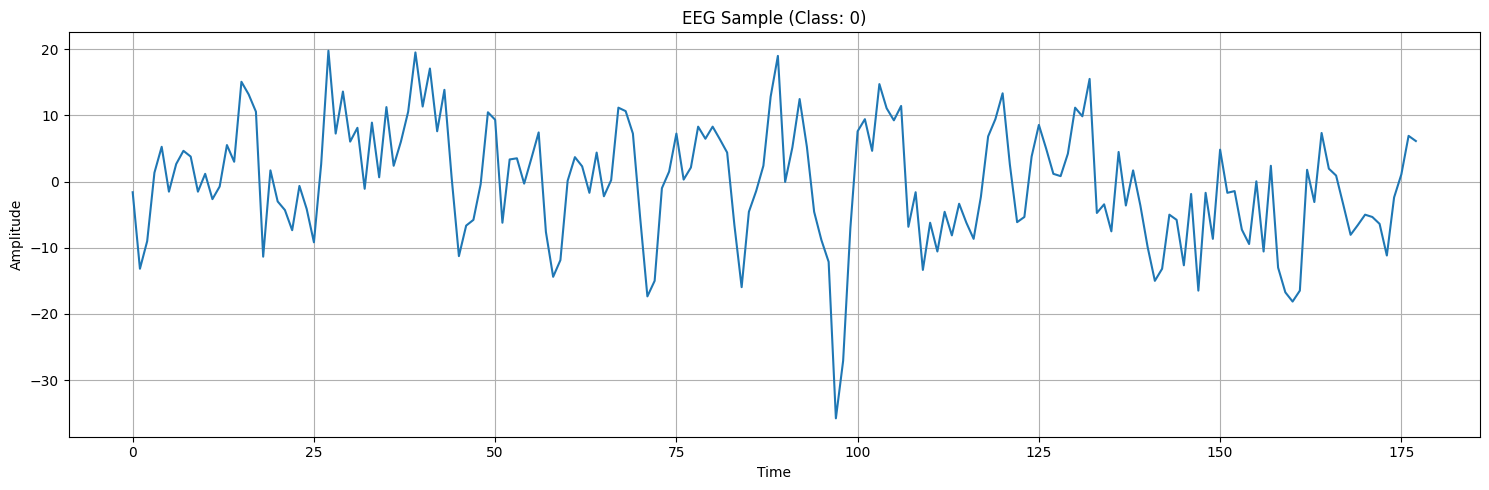

Preprocessing data...
Train set: 3999 samples, Test set: 1000 samples


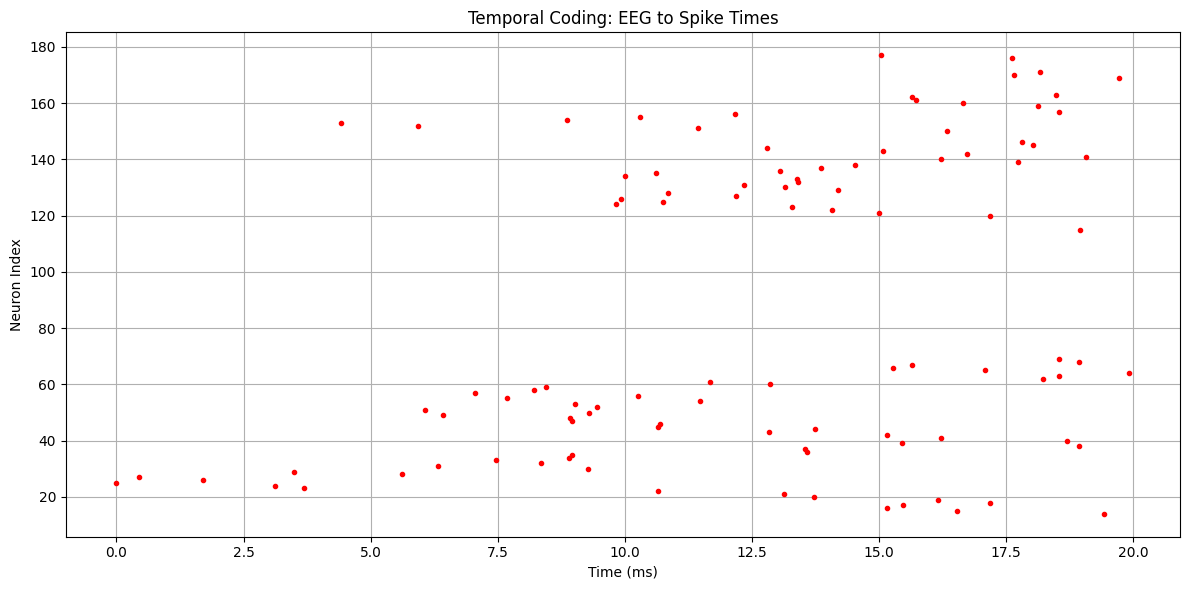

Creating SNN with architecture: 178-50-5
Training SNN with RProp...


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-6-19c30785ac6f>", line 59, in <cell line: 0>
    main()
  File "<ipython-input-6-19c30785ac6f>", line 34, in main
    history = snn.train_rprop(X_train, y_train, epochs=30, batch_size=32)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<ipython-input-3-366707998c73>", line 282, in train_rprop
    ih_grads, ho_grads = self.compute_gradients(sample_spike_times, target, t_max)
                         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<ipython-input-3-366707998c73>", line 196, in compute_gradients
    output_spikes = self.forward(spike_times, t_max)
                    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<ipython-input-3-366707998c73>", line None, in forward
KeyboardInterrupt

During handling of the above

In [ ]:
def main():
    # Set random seed for reproducibility
    np.random.seed(42)

    # 1. Load and preprocess data
    # --------------------------
    filepath = "Sleep Train 5000 .csv"  # Update with actual path
    X, y = load_data(filepath)

    # Visualize a sample
    visualize_eeg_sample(X, y)

    # Preprocess data
    X_train, X_test, y_train, y_test, scaler = preprocess_data(X, y)

    # 2. Convert to spike times
    # ------------------------
    # Display example of temporal coding
    sample_idx = 0
    spike_times = temporal_coding(X_train[sample_idx].reshape(1, -1))[0]
    visualize_spikes(spike_times, "Temporal Coding: EEG to Spike Times")

    # 3. Create and train SNN
    # ----------------------
    input_size = X_train.shape[1]
    hidden_size = 50  # Can be tuned
    output_size = len(np.unique(y))

    print(f"Creating SNN with architecture: {input_size}-{hidden_size}-{output_size}")
    snn = SpikingNeuralNetwork(input_size, hidden_size, output_size)

    # Train using RProp (as recommended in the abstract)
    print("Training SNN with RProp...")
    history = snn.train_rprop(X_train, y_train, epochs=30, batch_size=32)

    # Plot training history
    plot_training_history(history)

    # 4. Evaluate the model
    # --------------------
    print("Evaluating the model...")
    y_pred = snn.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Test Accuracy: {accuracy:.4f}")

    # Display classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    class_names = [f"Class {i}" for i in np.unique(y)]
    plot_confusion_matrix(y_test, y_pred, class_names)

    print("EEG classification with SNN completed!")

if __name__ == "__main__":
    main()

## **Third approach : using classical machine learning algorithms (KNN / SVM / Random forest)**



So the first approach we used was applying classical machine learning algorithms: KNN, SVM, and Random Forest. First, we performed feature extraction, and then we applied the algorithms.

### algorithms used :

#### SVM :

As is well known, SVM is a powerful classifier that separates the search space using a hyperplane. By using the kernel trick, this hyperplane can be transformed to take any shape, allowing for more flexible decision boundaries. In our approach, we trained the SVM on the data obtained from the first step and performed a grid search to find the best set of parameters to optimize its performance.


#### KNN :

K-Nearest Neighbors is a powerful machine learning algorithm that compares a query to the training set and assigns it the class based on the average of the k most similar instances. We first tuned the parameters using grid search to find the most suitable value of k, and then we ran the algorithm.

#### random forest

Random Forest is a well-known machine learning classifier appreciated for its interpretability. First, we split the data into multiple bootstraps, and each one is used to train a decision tree. Each tree provides a result along with a confidence factor. The final result is then calculated as the average of the individual classifiers' decisions, weighted by their confidence factors.


In [ ]:
import numpy as np
import pandas as pd
from scipy.fft import fft
import matplotlib.pyplot as plt


In [ ]:
import pandas as pd

file_path = '/content/Sleep Train 5000.csv'
df = pd.read_csv(file_path , header=None)


In [ ]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42)

print(f"Train shape: {X_train.shape}, {y_train.shape}")
print(f"Validation shape: {X_val.shape}, {y_val.shape}")
print(f"Test shape: {X_test.shape}, {y_test.shape}")

##### feature extraction :
We concatenated several statistical features to the new DataFrame to help differentiate between time series. These features include the mean, standard deviation, variance, minimum value, and maximum value.

In [ ]:

stats = {
    'mean': np.mean(X_train, axis=1),
    'std': np.std(X_train, axis=1),
    'var': np.var(X_train, axis=1),
    'min': np.min(X_train, axis=1),
    'max': np.max(X_train, axis=1),
    'median': np.median(X_train, axis=1),
    'range': np.ptp(X_train, axis=1),
    'skewness': skew(X_train, axis=1),
    'kurtosis': kurtosis(X_train, axis=1)
}


summary_df_train = pd.DataFrame(stats)

stats = {
    'mean': np.mean(X_val, axis=1),
    'std': np.std(X_val, axis=1),
    'var': np.var(X_val, axis=1),
    'min': np.min(X_val, axis=1),
    'max': np.max(X_val, axis=1),
    'median': np.median(X_val, axis=1),
    'range': np.ptp(X_val, axis=1),
    'skewness': skew(X_val, axis=1),
    'kurtosis': kurtosis(X_val, axis=1)
}


summary_df_val = pd.DataFrame(stats)

stats = {
    'mean': np.mean(X_test, axis=1),
    'std': np.std(X_test, axis=1),
    'var': np.var(X_test, axis=1),
    'min': np.min(X_test, axis=1),
    'max': np.max(X_test, axis=1),
    'median': np.median(X_test, axis=1),
    'range': np.ptp(X_test, axis=1),
    'skewness': skew(X_test, axis=1),
    'kurtosis': kurtosis(X_test, axis=1)
}

summary_df_test = pd.DataFrame(stats)



##### fourier transform :
Since the time domain was too compact to reveal useful trends, we transformed the data into the frequency domain using the Fourier Transform. This method highlights high-resolution details in the frequency domain, which can be helpful in our case.


In [ ]:
import numpy as np
import pandas as pd

def apply_fft(df: pd.DataFrame) -> pd.DataFrame:
    fft_magnitude = df.apply(lambda row: np.abs(np.fft.fft(row)), axis=1)
    fft_df = pd.DataFrame(fft_magnitude.tolist(), index=df.index)
    fft_df.columns = [f'fft_{i}' for i in range(fft_df.shape[1])]

    return fft_df


##### wavelet transform :
In this study, we are interested in both the frequency and time domains. Therefore, we considered using the Wavelet Transform, which captures patterns from both domains simultaneously, offering a more comprehensive representation.

In [ ]:
import pywt
import numpy as np
import pandas as pd

def apply_wavelet_to_dataframe(df, wavelet='db4', level=3):
    def apply_wavelet(row):
        coeffs = pywt.wavedec(row, wavelet=wavelet, level=level)
        return np.concatenate(coeffs)
    transformed = df.apply(lambda row: apply_wavelet(row.values), axis=1)
    transformed_df = pd.DataFrame(transformed.tolist(), index=df.index)

    return transformed_df


In [ ]:
X_train_fft = apply_fft(X_train)
X_test_fft = apply_fft(X_test)
X_val_fft = apply_fft(X_val)

In [ ]:
X_train = pd.concat([X_train_fft, summary_df_train], axis=1)
X_test= pd.concat([X_test_fft, summary_df_test], axis=1)
X_val = pd.concat([X_val_fft, summary_df_val], axis=1)


#### SVM :

In our case, using an SVM classifier makes sense since it will divide the search space using hyperplanes.

In [ ]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, classification_report

svm_model = SVC(kernel='rbf', random_state=42)
ova_model = OneVsRestClassifier(svm_model)


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import pandas as pd



param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}


svm = SVC()
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_val, y_val)


best_params = grid_search.best_params_
print("Best parameters:", best_params)


best_svm = SVC(**best_params)
best_svm.fit(X_train, y_train)

y_pred = best_svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)


#### KNN

Using KNN in this problem is intuitive since it aligns with the natural way of thinking — we compare the query to the existing training data and assign it the most similar class.

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']
}


pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])


grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_val, y_val)


best_params = grid_search.best_params_
print("Best parameters:", best_params)


best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)


y_pred = best_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)


#### random forest :

Random Forest is a bagging technique that combines the results of many weak learners (in our case, decision trees). Each weak learner assigns a class to the query with a confidence factor, and then the overall model decides which class to assign based on these outputs.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_val_new, y_val)


best_params = grid_search.best_params_
print("Best parameters:", best_params)


best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(X_train_new, y_train)


y_pred = best_rf.predict(X_test_new)

accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)


✅ Best parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
🎯 Test Accuracy: 0.6746666666666666


## **Fourth approach : using boosting method (XGBOOST classifer)**

In [ ]:
model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
y_pred = model.predict(X_test)

cr = accuracy_score(y_pred, y_test)
print("The classification accuracy is ", cr)

The classification accuracy is  0.671


In [ ]:
y_pred = model.predict(X_train)
accuracy_score(y_pred, y_train)

0.9889972493123281

In [ ]:
y_train = to_categorical(y_train, num_classes= num_classes)
y_test = to_categorical(y_test, num_classes= num_classes)

In [ ]:
X_train.shape

(3999, 310)

## **Fifth Approach using LSTM with spectral density transformations**

**Why use LSTM for EEG data?**
EEG signals are sequential time series data and lstm is good at learning patterns over time.

In [ ]:
X_train.shape

(3999, 310)

In [ ]:
y_train.shape

(3999, 5)

In [ ]:

X_train_reshaped = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1], 1))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential([
    LSTM(64, input_shape=(310, 1), return_sequences=True),
    Dropout(0.3),
    LSTM(32),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')
])

c:\Users\client\anaconda3\envs\tfenv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


history = model.fit(X_train_reshaped, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 21s 144ms/step - accuracy: 0.3679 - loss: 1.4481 - val_accuracy: 0.4040 - val_loss: 1.2723
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 17s 134ms/step - accuracy: 0.4368 - loss: 1.2331 - val_accuracy: 0.4210 - val_loss: 1.1943
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 22s 175ms/step - accuracy: 0.4508 - loss: 1.1763 - val_accuracy: 0.4720 - val_loss: 1.1928
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 44s 350ms/step - accuracy: 0.4651 - loss: 1.2025 - val_accuracy: 0.4830 - val_loss: 1.1444
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 22s 171ms/step - accuracy: 0.4987 - loss: 1.1369 - val_accuracy: 0.4970 - val_loss: 1.1272
Epoch 6/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 17s 133ms/step - accuracy: 0.5157 - loss: 1.0988 - val_accuracy: 0.5160 - val_loss: 1.1263
Epoch 7/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 21s 169ms/step - accuracy: 0.5411 - loss: 1.0873 - val_accuracy: 0.5140 - val_loss: 1.1243
Epoch 8/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 17s 136ms/step - accuracy: 0.5498 - loss: 1

In [ ]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.2f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.5552 - loss: 1.0620
Test Accuracy: 0.57


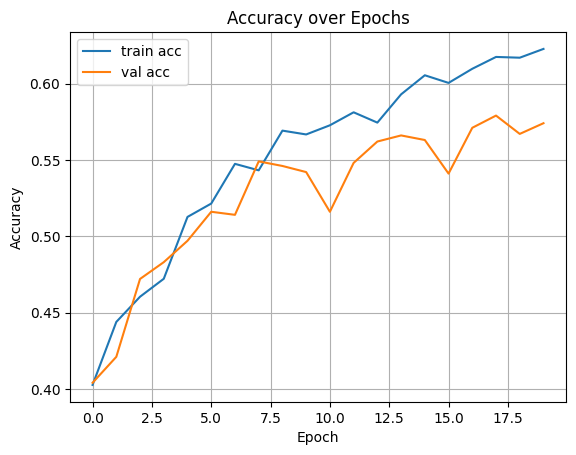

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


In [ ]:
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.59      0.38      0.46       111
           1       0.51      0.29      0.37       147
           2       0.58      0.61      0.60       389
           3       0.75      0.78      0.76       203
           4       0.41      0.63      0.50       150

    accuracy                           0.57      1000
   macro avg       0.57      0.54      0.54      1000
weighted avg       0.58      0.57      0.57      1000



## **Sixth Approach: Temporal Convolutional Networks**

In [ ]:
num_classes = len(y_train.unique()) if isinstance(y_train, pd.Series) else y_train.shape[-1]

In [ ]:
def tcn_block(x, filters, kernel_size, dilation_rate, dropout_rate):
    conv1 = Conv1D(filters, kernel_size, padding='causal', dilation_rate=dilation_rate, kernel_regularizer=l2(0.001))(x)
    norm1 = BatchNormalization()(conv1)
    act1 = Activation('relu')(norm1)
    drop1 = SpatialDropout1D(dropout_rate)(act1)

    conv2 = Conv1D(filters, kernel_size, padding='causal', dilation_rate=dilation_rate, kernel_regularizer=l2(0.001))(drop1)
    norm2 = BatchNormalization()(conv2)
    act2 = Activation('relu')(norm2)
    drop2 = SpatialDropout1D(dropout_rate)(act2)

    if x.shape[-1] == filters:
        res = Add()([x, drop2])
    else:
        res = Add()([Conv1D(filters, 1, kernel_regularizer=l2(0.001))(x), drop2])

    return res

In [ ]:
def build_tcn_model(input_shape, num_classes, num_blocks=3, filters=64, kernel_size=3, dropout_rate=0.2):
    inputs = Input(shape=input_shape)
    x = inputs


    for i in range(num_blocks):
        x = tcn_block(x, filters, kernel_size, dilation_rate=2 ** i, dropout_rate=dropout_rate)

    x = layers.Flatten()(x)
    x = Dense(64, activation='relu', kernel_regularizer=l2(0.001))(x)

    if num_classes == 2:
        outputs = Dense(1, activation='sigmoid', kernel_regularizer=l2(0.001))(x)
        loss = 'binary_crossentropy'
    else:
        outputs = Dense(num_classes, activation='softmax', kernel_regularizer=l2(0.001))(x)
        loss = 'categorical_crossentropy'

    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    return model

In [ ]:

X_train = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))


In [ ]:
model = build_tcn_model(input_shape=X_train.shape[1:], num_classes=num_classes)
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 310, 1)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cast_3 (Cast)       │ (None, 310, 1)    │          0 │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_7 (Conv1D)   │ (None, 310, 64)   │        256 │ cast_3[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 310, 64)   │        256 │ conv1d_7[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_6        │ (None, 310, 64)   │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ spatial_dropout1d_6 │ (None, 310, 64)   │          0 │ activation_6[0][… │
│ (SpatialDropout1D)  │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_8 (Conv1D)   │ (None, 310, 64)   │     12,352 │ spatial_dropout1… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 310, 64)   │        256 │ conv1d_8[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cast_4 (Cast)       │ (None, 310, 1)    │          0 │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_7        │ (None, 310, 64)   │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_9 (Conv1D)   │ (None, 310, 64)   │        128 │ cast_4[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ spatial_dropout1d_7 │ (None, 310, 64)   │          0 │ activation_7[0][… │
│ (SpatialDropout1D)  │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 310, 64)   │          0 │ conv1d_9[0][0],   │
│                     │                   │            │ spatial_dropout1… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_10 (Conv1D)  │ (None, 310, 64)   │     12,352 │ add_3[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 310, 64)   │        256 │ conv1d_10[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_8        │ (None, 310, 64)   │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ spatial_dropout1d_8 │ (None, 310, 64)   │          0 │ activation_8[0][… │
│ (SpatialDropout1D)  │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_11 (Conv1D)  │ (None, 310, 64)   │     12,352 │ spatial_dropout1… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 310, 64)   │        256 │ conv1d_11[0][0]   │
│ (BatchNormalizatio… │                   │            │                 

 Total params: 1,333,829 (5.09 MB)

 Trainable params: 1,333,061 (5.09 MB)

 Non-trainable params: 768 (3.00 KB)

In [ ]:

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

In [ ]:
from keras.callbacks import Callback

In [ ]:

class TrainingCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch + 1}: Training Accuracy = {logs['accuracy']:.4f}, Validation Accuracy = {logs['val_accuracy']:.4f}")


history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[TrainingCallback()])

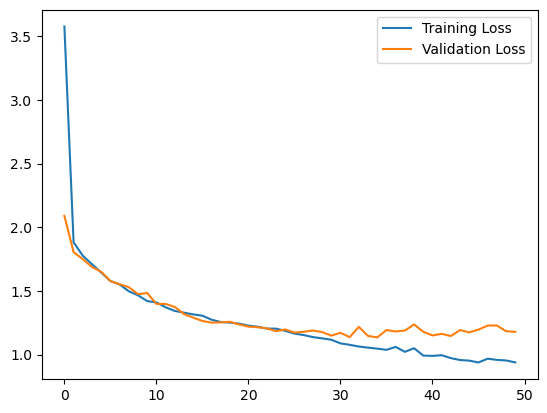

In [ ]:

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()

plt.show()

In [ ]:
y_pred = model.predict(X_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


In [ ]:
if num_classes > 2:
    y_pred = y_pred.argmax(axis=1)
else:
    y_pred = (y_pred > 0.5).astype(int)


In [ ]:

y_test = np.argmax(y_test, axis=1)


X_test = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))


loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

## **Seventh Approach: Time-Frequency Deep Learning Network using EEG Net**



Define a network that uses a time-frequency transformation of the input signal for classification.

In [ ]:
from keras import layers, models, regularizers, optimizers, callbacks
from keras import mixed_precision
policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)


In [ ]:
X_train = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

In [ ]:
X_train.shape

(3999, 310, 1)

now we will build the EEGNet which is a powerful neural network architecture trained to do signal classification

In [ ]:
def build_EEGNet(nb_classes, Chans=1, Samples=X_train.shape[1],
                 kernLength=64, F1=8, D=2, F2=16, dropoutRate=0.4):

    inputs = layers.Input((Samples, Chans), name="input_eeg")


    x = layers.Conv1D(F1, kernLength, padding='same', use_bias=False, name="temp_conv")(inputs)
    x = layers.BatchNormalization(name="temp_bn")(x)
    x = layers.Activation('relu', name="relu1")(x)


    x = layers.DepthwiseConv1D(Chans, depth_multiplier=D,
                               use_bias=False,
                               depthwise_constraint=tf.keras.constraints.max_norm(1.0),
                               name="spatial_conv")(x)
    x = layers.BatchNormalization(name="spatial_bn")(x)
    x = layers.Activation('relu', name="relu2")(x)
    x = layers.AveragePooling1D(4, name="avgpool1")(x)
    x = layers.Dropout(dropoutRate, name="dropout1")(x)


    branch1 = layers.Conv1D(F2, 3, padding='same', dilation_rate=1, name="dilated_conv_1")(x)
    branch2 = layers.Conv1D(F2, 3, padding='same', dilation_rate=2, name="dilated_conv_2")(x)
    branch3 = layers.Conv1D(F2, 3, padding='same', dilation_rate=3, name="dilated_conv_3")(x)

    x = layers.Concatenate(name="concat_multiscale")([branch1, branch2, branch3])


    x = layers.BatchNormalization(name="multiscale_bn")(x)
    x = layers.Activation('relu', name="relu3")(x)
    x = layers.AveragePooling1D(8, name="avgpool2")(x)
    x = layers.Dropout(dropoutRate, name="dropout2")(x)


    x = layers.GlobalAveragePooling1D(name="global_avg_pool")(x)

    x = layers.Dense(nb_classes,
                    activation='softmax',
                    kernel_regularizer=regularizers.l2(0.001),
                    name="output")(x)

    return models.Model(inputs, x, name="EEGNet_Optimized")



In [ ]:
num_classes = 5
model = build_EEGNet(nb_classes=num_classes, Chans=1)
model.compile(
    optimizer=optimizers.RMSprop(learning_rate=1e-3),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "EEGNet_Optimized"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_eeg           │ (None, 310, 1)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cast_1 (Cast)       │ (None, 310, 1)    │          0 │ input_eeg[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ temp_conv (Conv1D)  │ (None, 310, 8)    │        512 │ cast_1[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ temp_bn             │ (None, 310, 8)    │         32 │ temp_conv[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ relu1 (Activation)  │ (None, 310, 8)    │          0 │ temp_bn[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ spatial_conv        │ (None, 310, 16)   │         16 │ relu1[0][0]       │
│ (DepthwiseConv1D)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ spatial_bn          │ (None, 310, 16)   │         64 │ spatial_conv[0][… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ relu2 (Activation)  │ (None, 310, 16)   │          0 │ spatial_bn[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ avgpool1            │ (None, 77, 16)    │          0 │ relu2[0][0]       │
│ (AveragePooling1D)  │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout1 (Dropout)  │ (None, 77, 16)    │          0 │ avgpool1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dilated_conv_1      │ (None, 77, 16)    │        784 │ dropout1[0][0]    │
│ (Conv1D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dilated_conv_2      │ (None, 77, 16)    │        784 │ dropout1[0][0]    │
│ (Conv1D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dilated_conv_3      │ (None, 77, 16)    │        784 │ dropout1[0][0]    │
│ (Conv1D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concat_multiscale   │ (None, 77, 48)    │          0 │ dilated_conv_1[0… │
│ (Concatenate)       │                   │            │ dilated_conv_2[0… │
│                     │                   │            │ dilated_conv_3[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiscale_bn       │ (None, 77, 48)    │        192 │ concat_multiscal… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ relu3 (Activation)  │ (None, 77, 48)    │          0 │ multiscale_bn[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ avgpool2            │ (None, 9, 48)     │          0 │ relu3[0][0]       │
│ (AveragePooling1D)  │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout2 (Dropout)  │ (None, 9, 48)     │          0 │ avgpool2[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_avg_pool     │ (None, 48)        │          0 │ dropout2[0][0]  

 Total params: 3,413 (13.33 KB)

 Trainable params: 3,269 (12.77 KB)

 Non-trainable params: 144 (576.00 B)

In [ ]:
# --- Callbacks ---
reduce_lr = callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1
)
early_stop = callbacks.EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True, verbose=1
)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=64,
    validation_split=0.2,
    shuffle=True,
    callbacks=[reduce_lr, early_stop],
    verbose=2
)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4687 - loss: 1.2015
Test  accuracy: 0.5070
Test  loss:     1.1592


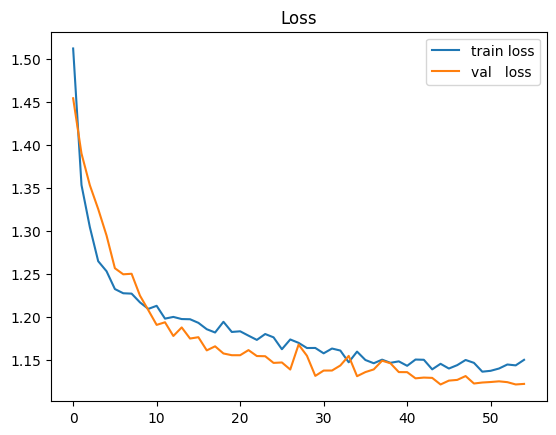

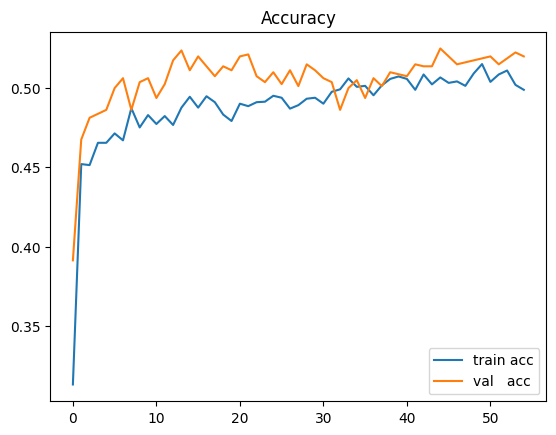

In [ ]:

test_loss, test_acc = model.evaluate(X_test, y_test, batch_size=64)
print(f"Test  accuracy: {test_acc:.4f}")
print(f"Test  loss:     {test_loss:.4f}")


import matplotlib.pyplot as plt

plt.figure()
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val   loss')
plt.legend(); plt.title('Loss')

plt.figure()
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val   acc')
plt.legend(); plt.title('Accuracy')
plt.show()

In [ ]:
train_loss, train_acc = model.evaluate(X_train, y_train, batch_size=64)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6576 - loss: 0.8807


## **Eighth aproach using hybrid apprach CNN + LSTM :**

we thought of using this aproach because combining CNN and LSTM leverages their individual strengths—CNN for extracting meaningful local features from the raw EEG signals, and LSTM for modeling the complex temporal dependencies in these signals—leading to a more powerful and accurate classification model.

In [ ]:
import numpy as np
import pandas as pd
from scipy.fft import fft
import matplotlib.pyplot as plt


In [ ]:
import pandas as pd

file_path = '/content/Sleep Train 5000.csv'
df = pd.read_csv(file_path , header=None)

print(df.head())


In [ ]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42)

print(f"Train shape: {X_train.shape}, {y_train.shape}")
print(f"Validation shape: {X_val.shape}, {y_val.shape}")
print(f"Test shape: {X_test.shape}, {y_test.shape}")

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

X_train = X_train.to_numpy()[..., np.newaxis]
X_test = X_test.to_numpy()[..., np.newaxis]

X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

y_train_cat = to_categorical(y_train, num_classes=5)
y_test_cat = to_categorical(y_test, num_classes=5)

print("X_train shape:", X_train.shape)
print("y_train shape (one-hot):", y_train_cat.shape)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, LSTM, Dense, Dropout, BatchNormalization, GlobalAveragePooling1D

model = Sequential([
    Input(shape=(178, 1)),

    Conv1D(64, kernel_size=7, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(128, kernel_size=5, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(256, kernel_size=3, activation='relu', padding='same'),
    BatchNormalization(),
    Dropout(0.3),

    LSTM(64, return_sequences=True),
    GlobalAveragePooling1D(),
    Dropout(0.5),

    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])


In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(patience=5, restore_best_weights=True)
lr_reduce = ReduceLROnPlateau(factor=0.5, patience=3, verbose=1)

history = model.fit(
    X_train, y_train_cat,
    validation_split=0.2,
    epochs=50,
    batch_size=64,
    callbacks=[early_stop, lr_reduce],
    verbose=1
)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(patience=5, restore_best_weights=True)
lr_reduce = ReduceLROnPlateau(factor=0.5, patience=3, verbose=1)

history = model.fit(
    X_train, y_train_cat,
    validation_split=0.2,
    epochs=50,
    batch_size=64,
    callbacks=[early_stop, lr_reduce],
    verbose=1
)


Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 16s 237ms/step - accuracy: 0.4038 - loss: 1.4136 - val_accuracy: 0.2029 - val_loss: 2.0009 - learning_rate: 0.0010
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 222ms/step - accuracy: 0.5226 - loss: 1.1756 - val_accuracy: 0.4100 - val_loss: 1.3862 - learning_rate: 0.0010
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 9s 191ms/step - accuracy: 0.5366 - loss: 1.1071 - val_accuracy: 0.5114 - val_loss: 1.1486 - learning_rate: 0.0010
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 11s 206ms/step - accuracy: 0.5835 - loss: 1.0025 - val_accuracy: 0.5671 - val_loss: 1.0638 - learning_rate: 0.0010
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 11s 221ms/step - accuracy: 0.5933 - loss: 0.9893 - val_accuracy: 0.6400 - val_loss: 0.8642 - learning_rate: 0.0010
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 219ms/step - accuracy: 0.5961 - loss: 0.9388 - val_accuracy: 0.6743 - val_loss: 0.8428 - learning_rate: 0.0010
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 8s 192ms/step - accuracy: 0.6253 - loss: 0.90

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test_cat)
print(f"Test Accuracy: {test_acc:.4f}")


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.6850 - loss: 0.7546
Test Accuracy: 0.7160


The proposed CNN-LSTM model achieved a test accuracy of 72%, which represents the best performance among the evaluated approaches.

# 3- **Generating Classification file for the given test data**

In [ ]:
## put the code here


# **4- Limitations :**

We had many approaches in mind and created several large architectures to tackle this problem. However, due to hardware constraints and the absence of GPUs, we couldn't obtain results from them. As you can see, the picture below is a screenshot of the runtime for one architecture before the laptop shut down. This architecture was inspired by powerful state-of-the-art models, and we are confident that if it had run successfully, the results would have been great.

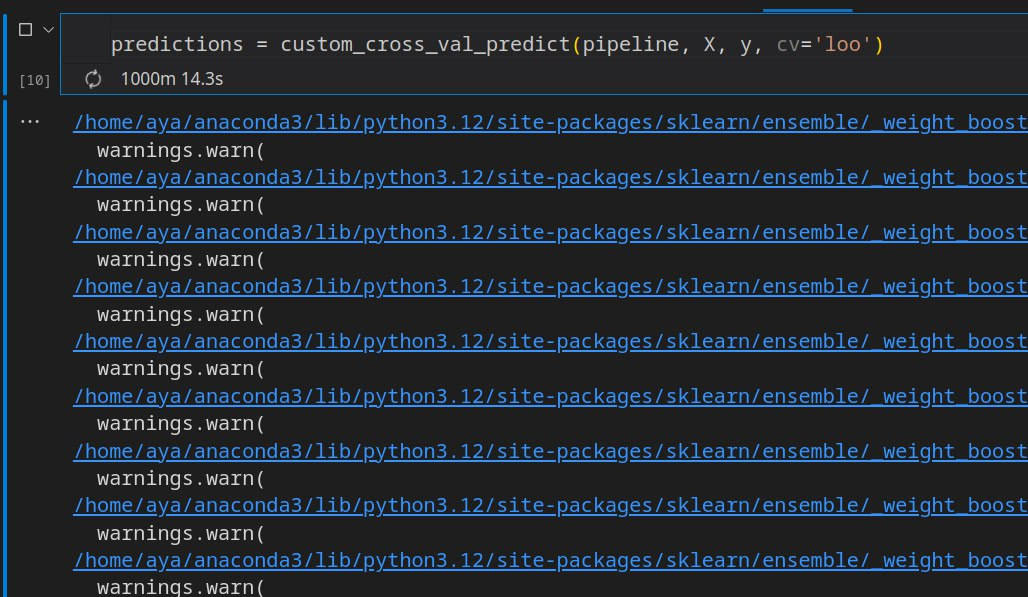

for the second Approach the architecture was too complex so ut run for 6 hours and then it crashed, but we believe if it completed running it will give good result because spiking neural network architecture memic perfectly how our brain work which make very suitable for this task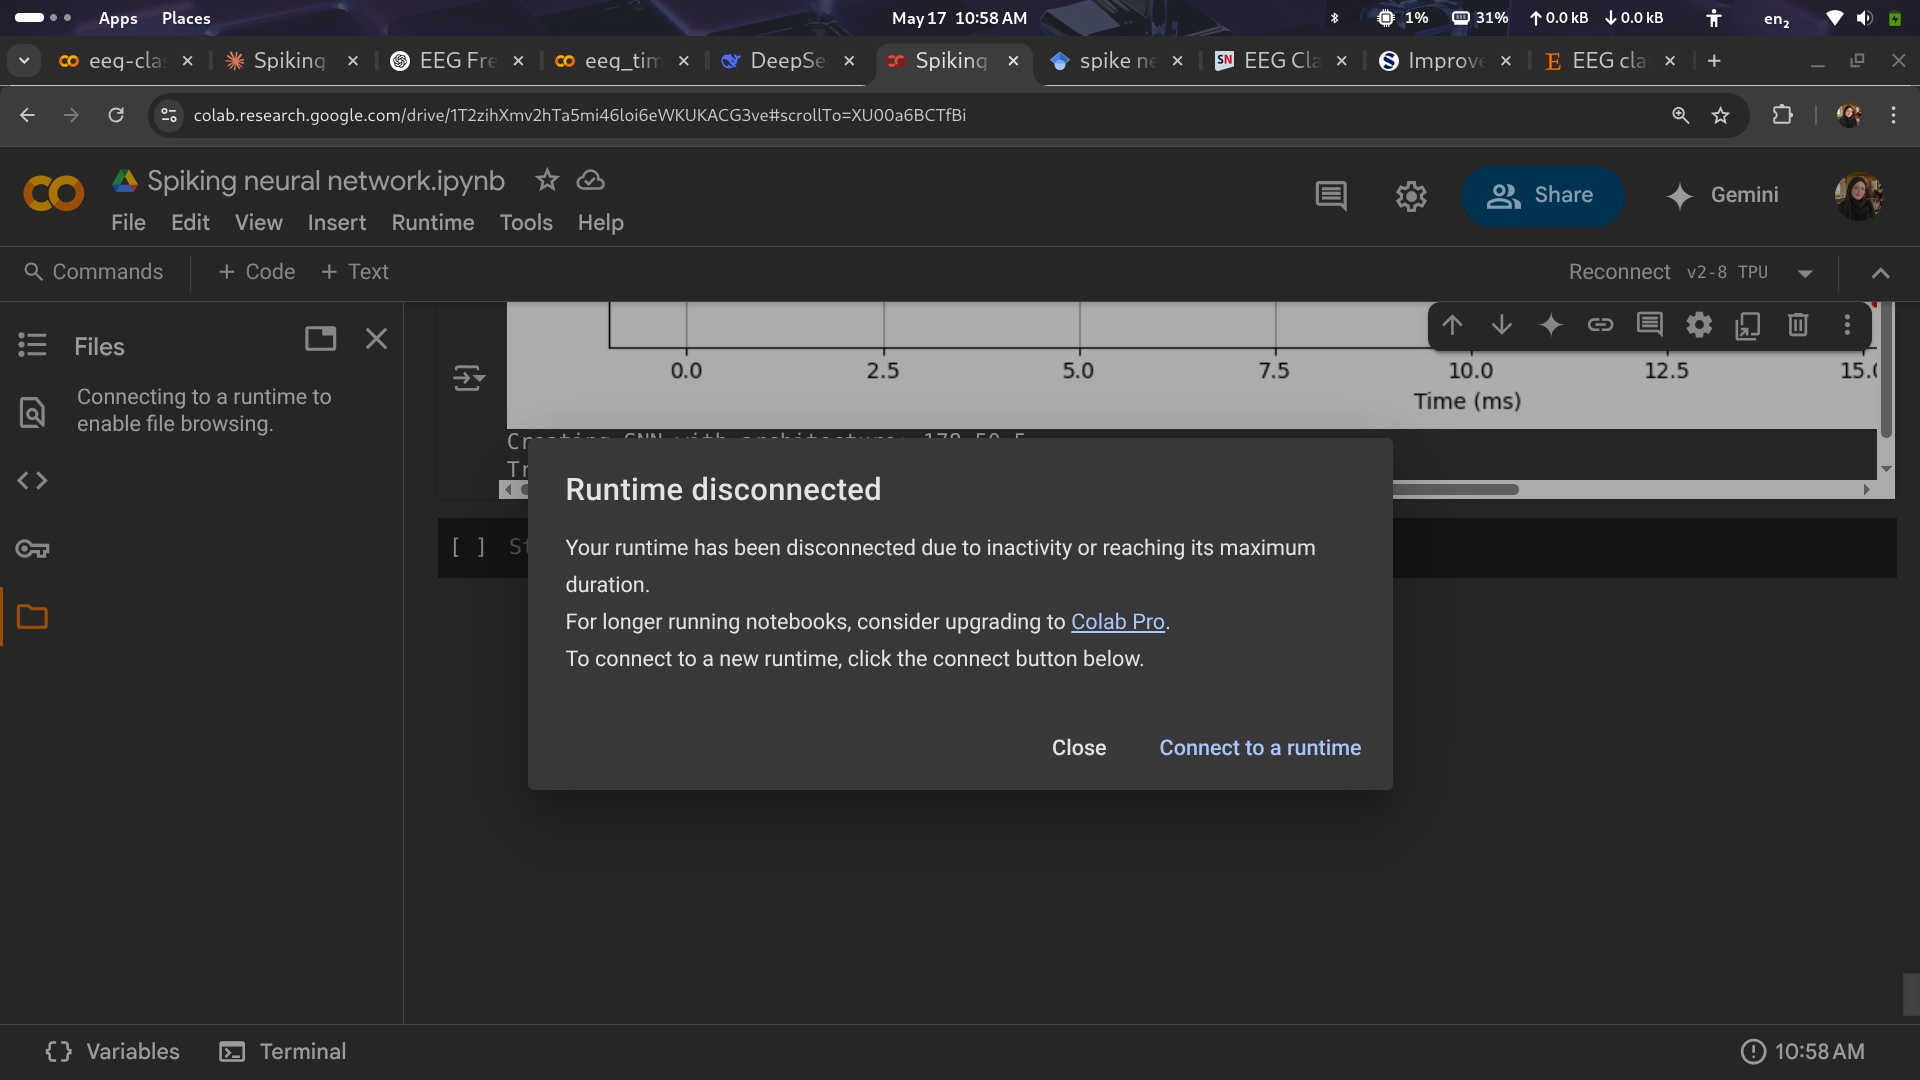

# **5- References :**
- we read multiple articles that helped us a lot during this project and we got inspired from them.
- 1-[Automatic classification of sleep stages using EEG signals and convolutional neural networks](https://pmc.ncbi.nlm.nih.gov/articles/PMC10817107/)

- 2-[EEG signals and convolutional neural networks](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0297582)

- 3-[SlumberNet: deep learning classification of sleep stages using residual neural networks](https://www.nature.com/articles/s41598-024-54727-0#:~:text=Sleep%20stage%20scoring&text=Low%20amplitude%20EEG%20and%20high,tone%20was%20defined%20as%20REM)

- 4-[Github Repository for Sleep Stage Classification using CNN + Attention mechanism (Transformers)](https://github.com/ayushbaid/AttendToSleep?tab=readme-ov-file)

- 5-[Classification of EEG signals using Transformer based deep learning and ensemble models
Author links open overlay panel](https://www.sciencedirect.com/science/article/abs/pii/S1746809423005633)

- 6-[EEG-GPT: Exploring Capabilities of Large Language Models for EEG Classification and Interpretation
](https://arxiv.org/abs/2401.18006)
- 7-[Deep learning techniques for classification of electroencephalogram (EEG) motor imagery (MI) signals](https://link.springer.com/article/10.1007/s00521-021-06352-5)
- 8-[Enhancing EEG signals classification using LSTM-CNN architecture](https://onlinelibrary.wiley.com/doi/10.1002/eng2.12827)
- 9-[Classification of EEG signals based on time-frequency analysis and spiking neural network](https://ieeexplore.ieee.org/document/9259508)
- 10-[A hybrid local-global neural network for visual classification using raw EEG signals](https://www.nature.com/articles/s41598-024-77923-4)
- 11-[EEG classification with limited data: A deep clustering approach](https://www.sciencedirect.com/science/article/abs/pii/S003132032400685X)
- 12-[Classification of EEG Signals Based on Pattern Recognition Approach](https://www.frontiersin.org/journals/computational-neuroscience/articles/10.3389/fncom.2017.00103/full)
- 13-[EEG Classification with BSA Spike Encoding Algorithm and Evolving Probabilistic Spiking Neural Network](https://link.springer.com/chapter/10.1007/978-3-642-24955-6_54)
- 14-[Improved spiking neural networks for EEG classification and epilepsy and seizure detection
](https://journals.sagepub.com/doi/abs/10.3233/ICA-2007-14301)
- 15-[EEG classification with spiking neural network: Smaller, better, more energy efficient](https://www.sciencedirect.com/science/article/abs/pii/S235264832100074X)


